# Importing Data
## Reading 100000 obeservations at once as a chunk 

In [1]:
import pandas as pd
import numpy as np

# train_labels = pd.read_csv('train_labels.csv')
# print(f"train labels size:{train_labels.shape}")

# chunksize = 10 ** 5

# data = pd.DataFrame()
# for chunk in pd.read_csv("train_data.csv", chunksize=chunksize):
#     data = pd.concat([data, chunk])

# train_data = data
# print(f"train data size:{train_data.shape}")

In [2]:
# Imports
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
import tensorflow.keras as keras
from keras.models import Sequential
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd, numpy as np, os, xgboost as xgb, matplotlib.pyplot as plt, seaborn as sns

# Sampling Data
## Sampling 20% of 'train_labels'

In [6]:
# sample_train_labels = train_labels.sample(frac=0.2, random_state=42)
# sample_train_labels.head()

,customer_ID,target
33412,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0
350485,c34b0cf3175108892e42e9382e8177847ac15636870604...,1
36829,14aff3c0e0ed2aaaef6deb127f2541b67fdd0002615bfd...,0
444951,f82be644eb90ab65d737b6dfc5de670559fa2ca23c98ea...,0
17537,09dec6d53f0f12db6edcaecbb4d2bddf41f220ba9569d1...,0


## Merging the sampled data to train_data

In [2]:
# sample_train_data = pd.merge(sample_train_labels, train_data,on='customer_ID',how='inner')
# print(sample_train_data.head())

# sample_train_data.to_csv('sample_train_data.csv', index=False)

NameError: name 'pd' is not defined

# Exploring 20% data

In [3]:
import pandas as pd
import numpy as np
sample_train_data = pd.read_csv('sample_train_data.csv')
df = pd.read_csv('sample_train_data.csv')
print(df.head())

print("Data Frame shape: ", df.shape)

df.info()

                                         customer_ID  target         S_2  \
0  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-03-21   
1  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-04-21   
2  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-05-08   
3  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-06-14   
4  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-07-26   

        P_2      D_39       B_1       B_2       R_1       S_3      D_41  ...  \
0  0.628534  0.004250  0.017667  0.815468  0.005736  0.265531  0.005933  ...   
1  0.669914  0.418321  0.354284  1.000587  0.009774  0.176196  0.007370  ...   
2  0.661933  0.003989  0.244867  1.008683  0.005743  0.169471  0.005953  ...   
3  0.644270  0.009351  0.017799  0.668398  0.003148  0.174020  0.006656  ...   
4  0.688055  0.002832  0.009458  0.779692  0.000870  0.174547  0.009100  ...   

   D_136  D_137  D_138     D_139     D_140     D_141  D_142   

In [4]:
print(df.shape)
print(df.columns)

(1107082, 191)
Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=191)


In [5]:
df

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,NaN,NaN,NaN,0.003869,0.008332,0.005805,NaN,0.006603,0.007874,0.002185
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,NaN,NaN,NaN,0.004872,0.008471,0.006763,NaN,0.009782,0.007285,0.000121
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,NaN,NaN,NaN,0.009246,0.009905,0.008673,NaN,0.003927,0.001159,0.000433
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,NaN,NaN,NaN,0.004311,0.006488,0.004953,NaN,0.009283,0.003769,0.006124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107077,f0defebbf6e79c14234a06c5b3522ee5914cb0f23fdd13...,0,2017-11-29,0.957207,0.003413,0.005511,0.811611,0.007821,NaN,0.002437,...,NaN,NaN,NaN,0.003099,0.000731,0.006184,NaN,0.006376,0.003519,0.007407
1107078,f0defebbf6e79c14234a06c5b3522ee5914cb0f23fdd13...,0,2017-12-30,0.826494,0.007873,0.009774,0.819318,0.007074,NaN,0.006983,...,NaN,NaN,NaN,0.007693,0.001338,0.001450,NaN,0.003571,0.001993,0.005287
1107079,f0defebbf6e79c14234a06c5b3522ee5914cb0f23fdd13...,0,2018-01-30,0.828001,0.002666,0.001569,0.815946,0.001636,NaN,0.005888,...,NaN,NaN,NaN,NaN,0.006918,NaN,NaN,NaN,0.001155,NaN
1107080,f0defebbf6e79c14234a06c5b3522ee5914cb0f23fdd13...,0,2018-02-27,0.825479,0.001338,0.006197,0.812589,0.000352,NaN,0.003774,...,NaN,NaN,NaN,0.009021,0.006564,0.000960,NaN,0.001825,0.006149,0.009502


# Cleaning Data 

In [6]:
# Coverting the S_2 to datatime object
df['S_2'] = pd.to_datetime(df['S_2'])

In [7]:
print("Number of columns with missing values: ", len(df.columns[df.isna().any()]))

Number of columns with missing values:  120


### The 'customer_ID, 'S_2'(date time are excluded)

In [8]:
# Replacing null values of categorical features with mode and numerical features with mean

all_cols = [c for c in list(df.columns) if c not in ['customer_ID','S_2']]

# There are 11 cat_features
cat_features = ["B_30","B_38","D_114","D_116","D_117","D_120","D_126","D_63","D_64","D_66","D_68"]

#There are 180 num_features
num_features = [col for col in all_cols if col not in cat_features]

for feature in cat_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])
    
for feature in num_features:
    df[feature] = df[feature].fillna(df[feature].mean())

In [9]:
print("Number of columns with missing values: ", len(df.columns[df.isna().any()]))

Number of columns with missing values:  0


In [10]:
print("List of Categorical Features are: ", cat_features)
print("Total number of Categorical Features", len(cat_features))
print("Total number of Numerical Features", len(num_features))
print(df.shape)
print(df.columns)

List of Categorical Features are:  ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
Total number of Categorical Features 11
Total number of Numerical Features 178
(1107082, 191)
Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=191)


### So, There are total 191 features, 'customer_ID', 'S_2', 11 cat_featues, 178 num_features

## Converting categorical data into numerical values using One-hot encoding

In [11]:
cat_features = ["B_30","B_38","D_114","D_116","D_117","D_120","D_126","D_63","D_64","D_66","D_68"]
df_encoded = pd.get_dummies(df, columns=cat_features, prefix=cat_features, dtype='int')
print(df_encoded.shape)
df_encoded.to_csv('encoded_data.csv', index=False)
df2 = pd.read_csv('encoded_data.csv')
df2.head()


(1107082, 225)


,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,0,0,1,0,0,0,0,0,0,1
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,0,0,1,0,0,0,0,0,0,1
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,0,0,1,0,0,1,0,0,0,0
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,0,0,1,0,0,1,0,0,0,0
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,0,0,1,0,0,1,0,0,0,0


In [12]:
df2.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,0,0,1,0,0,0,0,0,0,1
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,0,0,1,0,0,0,0,0,0,1
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,0,0,1,0,0,1,0,0,0,0
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,0,0,1,0,0,1,0,0,0,0
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,0,0,1,0,0,1,0,0,0,0


### after one-hot encoding of 11 cat_features we have 225 features, i.e 11 cat_features we encoded to 45 Features and we have 178 num_features,

In [13]:
print(df2.columns)
print(df2.shape)

Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_64_U', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0',
       'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0'],
      dtype='object', length=225)
(1107082, 225)


In [14]:
# Check the number of columns in df_encoded
num_columns_df_encoded = df_encoded.shape[1]

# Check the number of columns in df2
num_columns_df2 = df2.shape[1]

# Compare the number of columns
if num_columns_df_encoded == num_columns_df2:
    print("Both DataFrames have the same number of columns:", num_columns_df_encoded)
else:
    print("The number of columns in df_encoded:", num_columns_df_encoded)
    print("The number of columns in df2:", num_columns_df2)


Both DataFrames have the same number of columns: 225


In [15]:
# Get the columns present in df_encoded but not in df2
columns_only_in_df_encoded = set(df_encoded.columns) - set(df2.columns)

# Get the columns present in df2 but not in df_encoded
columns_only_in_df2 = set(df2.columns) - set(df_encoded.columns)

# Print the columns present only in df_encoded
print("Columns present only in df_encoded:", columns_only_in_df_encoded)

# Print the columns present only in df2
print("Columns present only in df2:", columns_only_in_df2)



Columns present only in df_encoded: set()
Columns present only in df2: set()


In [16]:
# Find the highest date in the 'S_2' column
highest_date = df2['S_2'].max()

# Find the lowest date in the 'S_2' column
lowest_date = df2['S_2'].min()

print("Highest date in 'S_2' column:", highest_date)
print("Lowest date in 'S_2' column:", lowest_date)


Highest date in 'S_2' column: 2018-03-31
Lowest date in 'S_2' column: 2017-03-01


# Feature Engineering

In [17]:
# Sort data by 'customer_ID'
df2.sort_values(by=['customer_ID'], inplace=True)

# list of months for rolling window calculations
months = [3, 6, 9, 12]

# Convert months to days assuming 30 days in a month
window_sizes = [m*30 for m in months]

# For each customer_ID group, calculate the windowed operations
grouped = df2.groupby('customer_ID')

new_features = ['P_2','B_1','B_2','R_1','S_3']
for feature in new_features:
    for window_size in window_sizes:
        df2[f'{feature}_min_{window_size}'] = grouped[feature].transform(lambda x: x.rolling(window=window_size).min())
        df2[f'{feature}_max_{window_size}'] = grouped[feature].transform(lambda x: x.rolling(window=window_size).max())
        df2[f'{feature}_sum_{window_size}'] = grouped[feature].transform(lambda x: x.rolling(window=window_size).sum())
        df2[f'{feature}_avg_{window_size}'] = grouped[feature].transform(lambda x: x.rolling(window=window_size).mean())
        df2[f'{feature}_response_rate_{window_size}'] = grouped[feature].transform(lambda x: x.rolling(window=window_size).apply(lambda y: (y==1).sum()/len(y), raw=False))

/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_11847/1840259839.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{feature}_sum_{window_size}'] = grouped[feature].transform(lambda x: x.rolling(window=window_size).sum())
/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_11847/1840259839.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{feature}_avg_{window_size}'] = grouped[feature].transform(lambda x: x.rolling(window=window_size).mean())
/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ip

### We can see that we have data from 2017-03-01 to 2018-03-31, we have 13 months of customer data

In [18]:
# Find the highest date in the 'S_2' column
highest_date = df2['S_2'].max()

# Find the lowest date in the 'S_2' column
lowest_date = df2['S_2'].min()

print("Highest date in 'S_2' column:", highest_date)
print("Lowest date in 'S_2' column:", lowest_date)


Highest date in 'S_2' column: 2018-03-31
Lowest date in 'S_2' column: 2017-03-01


In [19]:
df2.head

<bound method NDFrame.head of                                               customer_ID  target         S_2  \
92994   000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...       0  2018-01-11   
92996   000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...       0  2018-03-12   
92993   000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...       0  2017-12-19   
92992   000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...       0  2017-11-10   
92991   000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...       0  2017-10-15   
...                                                   ...     ...         ...   
446180  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0  2018-01-06   
446181  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0  2018-02-06   
446171  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0  2017-04-20   
446177  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0  2017-10-20   
446170  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0  2017-03-20  

In [20]:
df2

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,S_3_min_270,S_3_max_270,S_3_sum_270,S_3_avg_270,S_3_response_rate_270,S_3_min_360,S_3_max_360,S_3_sum_360,S_3_avg_360,S_3_response_rate_360
92994,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2018-01-11,0.414444,0.006512,0.100998,0.055903,0.000040,0.333741,0.007850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92996,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2018-03-12,0.477116,0.000467,0.009413,1.009217,0.007775,0.267037,0.006128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92993,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-12-19,0.412912,0.003498,0.112638,0.057964,0.000030,0.367211,0.006090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92992,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-11-10,0.407172,0.001548,0.106145,0.048557,0.001353,0.330037,0.009187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92991,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-10-15,0.560474,0.001538,0.090844,0.046120,0.006817,0.302323,0.006669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446180,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446181,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446171,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2017-04-20,1.000050,0.240620,0.090471,0.239062,0.003122,-0.012420,0.005149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446177,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2017-10-20,0.979511,0.002230,0.022695,0.557029,0.008897,0.091565,0.000880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df2.shape

(1107082, 325)

# Spliting Data

In [22]:
from sklearn.model_selection import train_test_split
# 70% train set and a 30% test set
train_set, test_set = train_test_split(df2, test_size=0.3, random_state=42)

# Split test set into a 15% test1 set and a 15% test2 set
test1_set, test2_set = train_test_split(test_set, test_size=0.5, random_state=42)

#resulting sets
print("Train set shape:", train_set.shape)
print("Test1 set shape:", test1_set.shape)
print("Test2 set shape:", test2_set.shape)

Train set shape: (774957, 325)
Test1 set shape: (166062, 325)
Test2 set shape: (166063, 325)


# XGBoost Setup

In [23]:
!pip install xgboost

### dropped 'target', 'S_2', 'customer_ID' columns

In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Split data into features (X) and target (y)
X = train_set.drop(columns=['target','S_2','customer_ID'])
y = train_set['target']

In [25]:
X.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,S_3_min_270,S_3_max_270,S_3_sum_270,S_3_avg_270,S_3_response_rate_270,S_3_min_360,S_3_max_360,S_3_sum_360,S_3_avg_360,S_3_response_rate_360
731039,0.466244,0.030615,0.583472,0.023601,0.005134,0.172654,0.005807,0.900668,0.185299,0.428466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21540,0.554465,0.537783,0.615354,0.047205,0.259614,0.137252,0.006543,0.418624,0.185299,0.154266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950728,0.923174,0.003888,0.017377,1.005506,0.007479,0.092103,0.003036,0.006452,0.185299,0.060434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
913539,0.585331,0.004660,0.001615,1.008598,0.007264,0.418405,0.007760,0.003461,0.039794,0.182627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941191,0.890957,0.002733,0.000428,0.818741,0.009444,0.224457,0.005907,0.004849,0.185299,0.071761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
y.head()

731039    1
21540     0
950728    0
913539    0
941191    0
Name: target, dtype: int64

In [27]:
df2

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,S_3_min_270,S_3_max_270,S_3_sum_270,S_3_avg_270,S_3_response_rate_270,S_3_min_360,S_3_max_360,S_3_sum_360,S_3_avg_360,S_3_response_rate_360
92994,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2018-01-11,0.414444,0.006512,0.100998,0.055903,0.000040,0.333741,0.007850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92996,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2018-03-12,0.477116,0.000467,0.009413,1.009217,0.007775,0.267037,0.006128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92993,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-12-19,0.412912,0.003498,0.112638,0.057964,0.000030,0.367211,0.006090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92992,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-11-10,0.407172,0.001548,0.106145,0.048557,0.001353,0.330037,0.009187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92991,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0,2017-10-15,0.560474,0.001538,0.090844,0.046120,0.006817,0.302323,0.006669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446180,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446181,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446171,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2017-04-20,1.000050,0.240620,0.090471,0.239062,0.003122,-0.012420,0.005149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446177,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2017-10-20,0.979511,0.002230,0.022695,0.557029,0.008897,0.091565,0.000880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
y.head()

731039    1
21540     0
950728    0
913539    0
941191    0
Name: target, dtype: int64

## XGBoost model without given parameters

In [29]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# XGBClassifier object
xg_clf = xgb.XGBClassifier(use_label_encoder=False)

# Fit the classifier to the training data
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

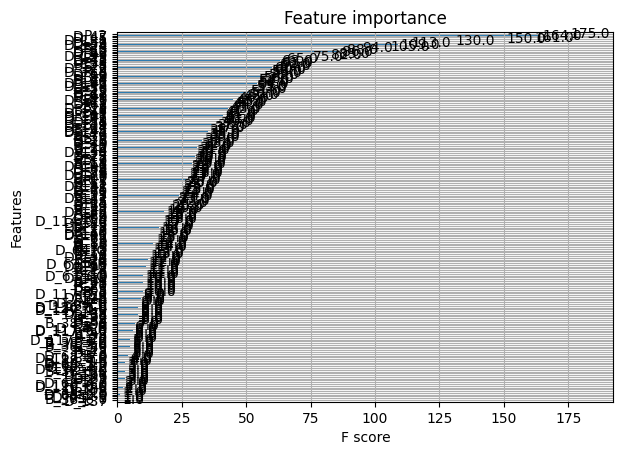

In [30]:
xgb.plot_importance(xg_clf.fit(X_train, y_train), importance_type='weight')

In [31]:
X_train

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,S_3_min_270,S_3_max_270,S_3_sum_270,S_3_avg_270,S_3_response_rate_270,S_3_min_360,S_3_max_360,S_3_sum_360,S_3_avg_360,S_3_response_rate_360
1010769,0.618623,0.007293,0.009342,1.006178,0.009612,0.224457,0.006312,0.278990,0.185299,0.149587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343100,0.375884,0.037354,0.716031,0.024087,0.008473,0.284484,0.007506,0.661175,0.185299,0.023858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977099,0.313622,0.097644,0.090061,0.207015,0.001802,0.102254,0.009231,0.070078,0.325701,0.154266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628268,0.546460,0.416276,0.065265,1.008536,0.003216,0.166889,0.009669,0.009781,0.269948,0.154266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720297,0.408935,0.039077,0.386430,0.059132,0.007282,0.276418,0.501022,0.700209,0.185299,0.012806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443891,0.820778,0.001787,0.004481,0.818773,0.008146,0.224457,0.007586,0.002182,0.185299,0.103362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616302,0.904296,0.416827,0.040148,0.547699,0.001304,0.155115,0.007454,0.069838,0.185299,0.042065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84781,0.798539,0.002207,0.002411,0.819906,0.005790,0.224457,0.008440,0.001533,0.185299,0.154266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44640,1.008315,0.005514,0.027958,0.811013,0.003797,0.372027,0.005759,0.009353,0.009938,0.154266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
y_train

1010769    0
343100     0
977099     1
628268     0
720297     1
          ..
443891     0
616302     0
84781      0
44640      0
572838     0
Name: target, Length: 542469, dtype: int64

In [ ]:
help(XGBClassifier)

## Imporatant features

In [33]:
feature_importances = xg_clf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_df.to_csv('feature_importances.csv', index=False)
print (features_df.to_string())


                   Feature  Importance
0                      P_2    0.220868
1                     D_39    0.004944
2                      B_1    0.084971
3                      B_2    0.009654
4                      R_1    0.029699
5                      S_3    0.013540
6                     D_41    0.007539
7                      B_3    0.012787
8                     D_42    0.012507
9                     D_43    0.007327
10                    D_44    0.015628
11                     B_4    0.006307
12                    D_45    0.009755
13                     B_5    0.005195
14                     R_2    0.003383
15                    D_46    0.006721
16                    D_47    0.003099
17                    D_48    0.006176
18                    D_49    0.005082
19                     B_6    0.005371
20                     B_7    0.006766
21                     B_8    0.004905
22                    D_50    0.002754
23                    D_51    0.015793
24                     B_

In [34]:
type(features_df)

pandas.core.frame.DataFrame

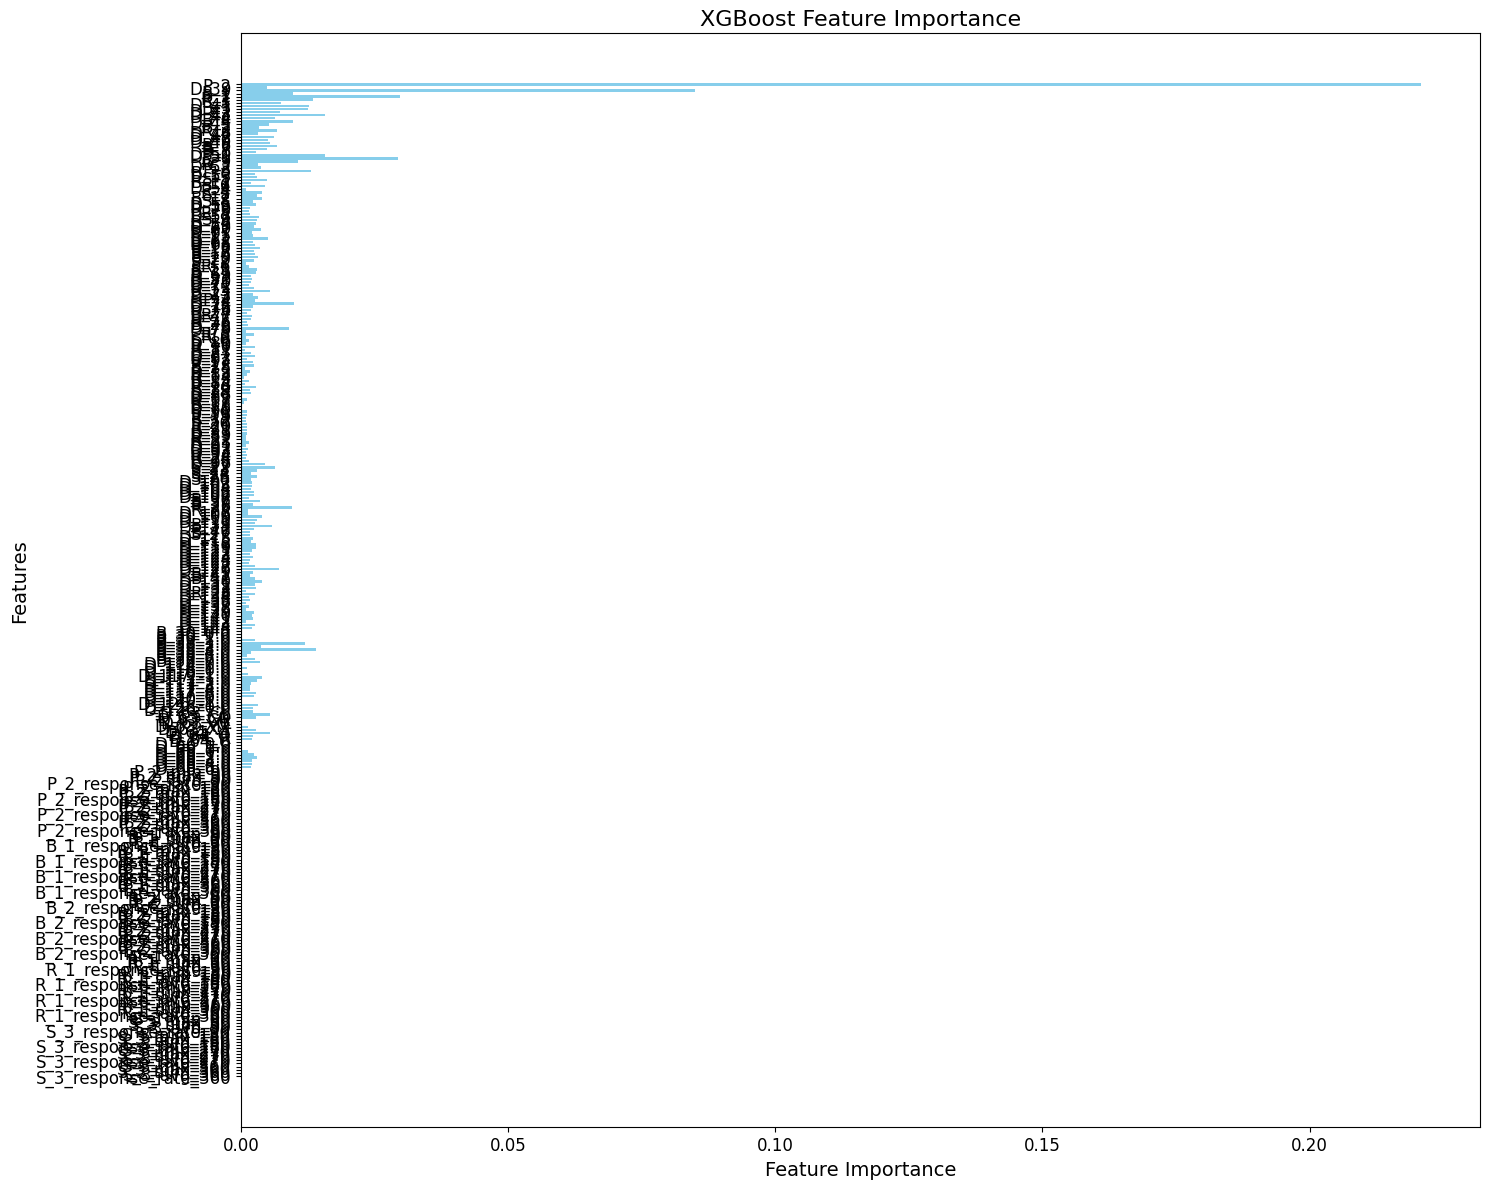

In [35]:
plt.figure(figsize=(15, 12))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('XGBoost Feature Importance', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

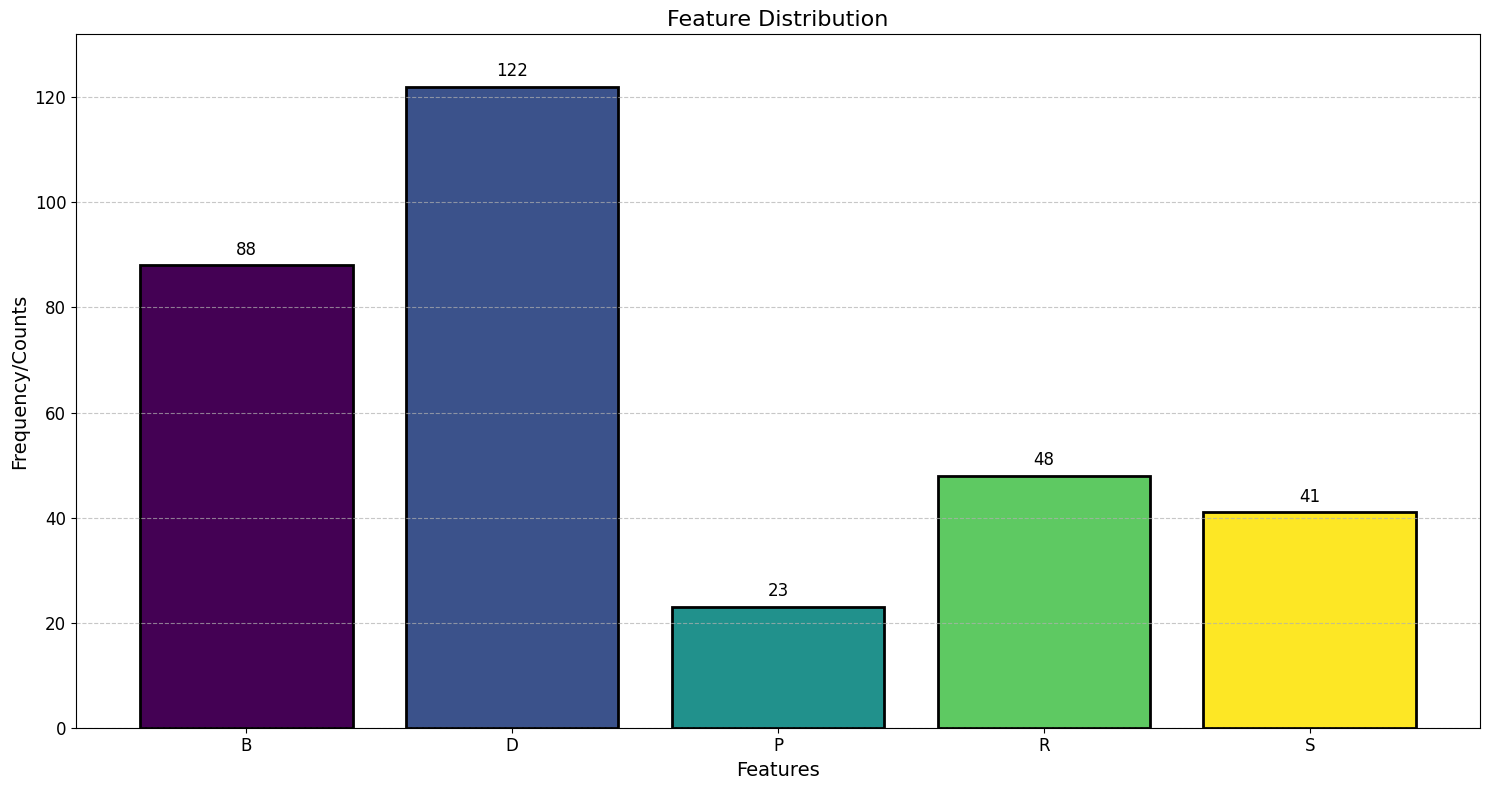

In [36]:
categories = ['B', 'D', 'P', 'R', 'S']
cat_count_values = [len([i for i in X_train.columns if i.startswith("B")]), 
                    len([i for i in X_train.columns if i.startswith("D")]), 
                    len([i for i in X_train.columns if i.startswith("P")]), 
                    len([i for i in X_train.columns if i.startswith("R")]), 
                    len([i for i in X_train.columns if i.startswith("S")])]
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(categories)))
plt.figure(figsize=(15, 8)) 
plt.bar(categories, cat_count_values, color=colors, edgecolor='black', linewidth=2)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Frequency/Counts', fontsize=14)
plt.title('Feature Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(cat_count_values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(cat_count_values) + 10)
plt.tight_layout()
plt.show()

# XGBoost model with given parameters

In [37]:
from sklearn.utils.class_weight import compute_sample_weight

#weights for the target variable
weights = compute_sample_weight(class_weight={0:1, 1:5}, y=y_train)

# Create an XGBClassifier object
xg_clf2 = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.5,
    max_depth=4,
    subsample=0.5,
    colsample_bytree=0.5,
    use_label_encoder=False
)

# Fit the classifier to the training data
xg_clf2.fit(X_train, y_train, sample_weight=weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

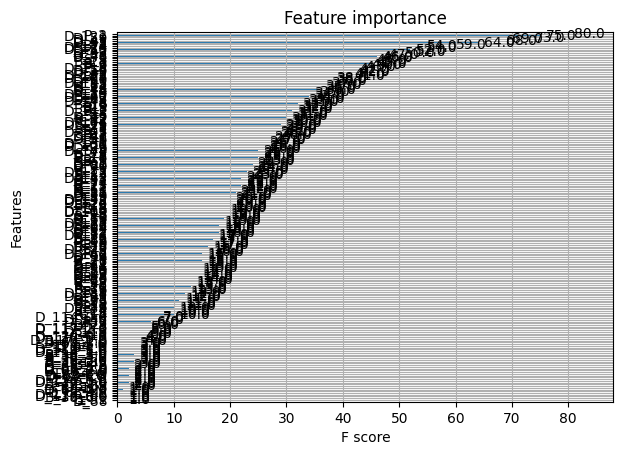

In [38]:
xgb.plot_importance(xg_clf2.fit(X_train, y_train), importance_type='weight')

# Feature Importance

In [39]:
# feature importance
feature_importances2 = xg_clf2.feature_importances_

features_df2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances2
})

features_df2.to_csv('feature_importances2.csv', index=False)
print (features_df2.to_string())


# feature_importances = xg_clf.feature_importances_
# features_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importances
# })

# features_df.to_csv('feature_importances.csv', index=False)
# print (features_df.to_string())

                   Feature  Importance
0                      P_2    0.095898
1                     D_39    0.004054
2                      B_1    0.013883
3                      B_2    0.210299
4                      R_1    0.019360
5                      S_3    0.013369
6                     D_41    0.008684
7                      B_3    0.013131
8                     D_42    0.032011
9                     D_43    0.005514
10                    D_44    0.002863
11                     B_4    0.004033
12                    D_45    0.002808
13                     B_5    0.004037
14                     R_2    0.003394
15                    D_46    0.006167
16                    D_47    0.003181
17                    D_48    0.002978
18                    D_49    0.003967
19                     B_6    0.002574
20                     B_7    0.024851
21                     B_8    0.045554
22                    D_50    0.002305
23                    D_51    0.007154
24                     B_

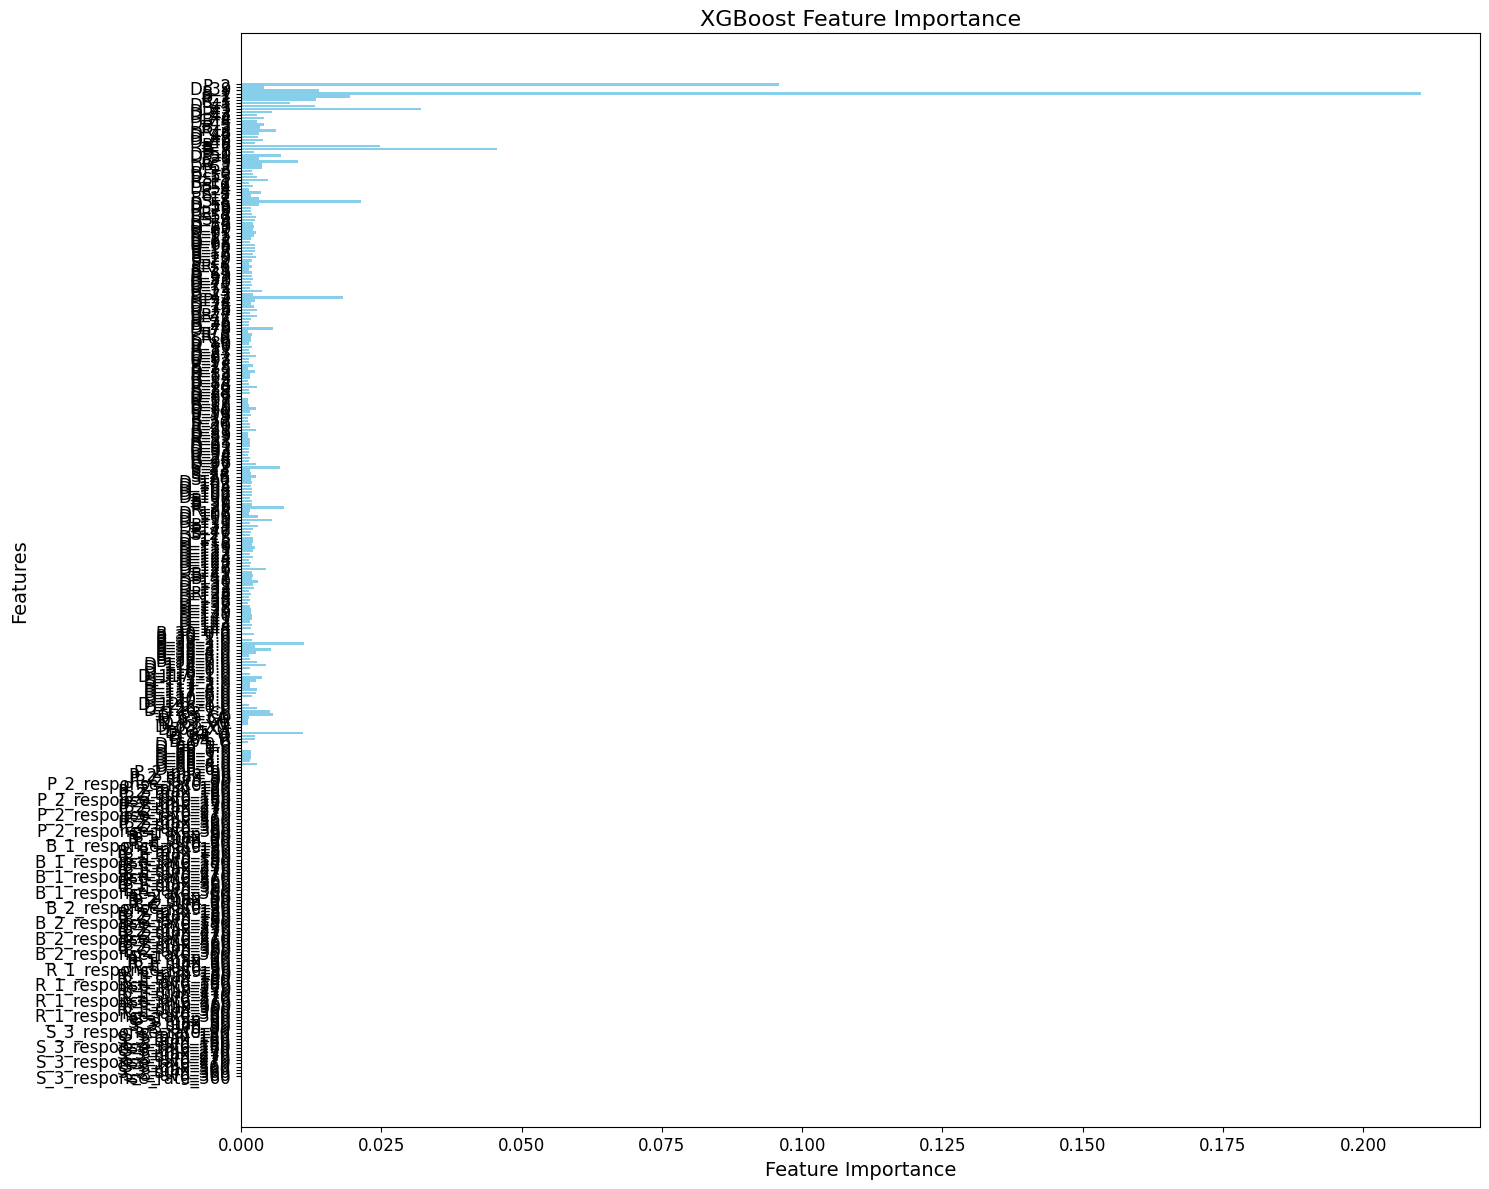

In [40]:
plt.figure(figsize=(15, 12))
plt.barh(features_df2['Feature'], features_df2['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('XGBoost Feature Importance', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()





In [41]:
train_set.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,S_3_min_270,S_3_max_270,S_3_sum_270,S_3_avg_270,S_3_response_rate_270,S_3_min_360,S_3_max_360,S_3_sum_360,S_3_avg_360,S_3_response_rate_360
731039,ce69d8d6f6f05951d491e38c376c27db2410fdc8d1a84f...,1,2018-03-22,0.466244,0.030615,0.583472,0.023601,0.005134,0.172654,0.005807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21540,d853737ae63b7ef92ed9f4a0ec69e4e95bc1800c770f84...,0,2017-07-29,0.554465,0.537783,0.615354,0.047205,0.259614,0.137252,0.006543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950728,e1f772f97ba0188cca9337af2fb28f3114b03f77f752af...,0,2017-07-08,0.923174,0.003888,0.017377,1.005506,0.007479,0.092103,0.003036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
913539,c4826208e6aeb5c79496cf2aeab676044e5f1105dcdfcb...,0,2017-12-31,0.585331,0.004660,0.001615,1.008598,0.007264,0.418405,0.007760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941191,9c5e97a1c5b59a96ea41d62689bfcd018ab8c2534c3c78...,0,2017-03-16,0.890957,0.002733,0.000428,0.818741,0.009444,0.224457,0.005907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
features_df2

,Feature,Importance
0,P_2,0.095898
1,D_39,0.004054
2,B_1,0.013883
3,B_2,0.210299
4,R_1,0.019360
...,...,...
317,S_3_min_360,0.000000
318,S_3_max_360,0.000000
319,S_3_sum_360,0.000000
320,S_3_avg_360,0.000000


# Features with feature importance of higher 0.5%

In [43]:
features_default_model = pd.read_csv('feature_importances.csv')
features_parameters_model = pd.read_csv('feature_importances2.csv')



In [44]:
threshold = 0.5 / 100  

#features that meet the threshold in both models
features_default_model_above_threshold = features_default_model[features_default_model['Importance'] > threshold]['Feature']
features_parameters_model_above_threshold = features_parameters_model[features_parameters_model['Importance'] > threshold]['Feature']

In [45]:
# Combining the features from both models
selected_features_df = pd.concat([features_default_model_above_threshold, features_parameters_model_above_threshold]).drop_duplicates().reset_index(drop=True)

selected_features_df.to_csv('selected_features_df.csv', index=False)

In [63]:
threshold = 0.5/100
#features that meet the threshold in both models
features_default_model_above_threshold_temp = features_default_model[features_default_model['Importance'] > threshold]
features_parameters_model_above_threshold_temp = features_parameters_model[features_parameters_model['Importance'] > threshold]
# Combining the features from both models
selected_features_df_temp = pd.concat([features_default_model_above_threshold_temp, features_parameters_model_above_threshold_temp]).drop_duplicates().reset_index(drop=True)
selected_features_df_temp.sort_values(['Importance'], ascending=False).drop_duplicates(subset=['Feature'], keep='first')

,Feature,Importance
0,P_2,0.220868
36,B_2,0.210299
1,B_1,0.084971
45,B_8,0.045554
41,D_42,0.032011
3,R_1,0.029699
19,B_9,0.029418
44,B_7,0.024851
48,D_55,0.021437
49,P_4,0.018201


In [46]:
# plt.figure(figsize=(15, 12))
# plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color='skyblue')
# plt.xlabel('Feature Importance', fontsize=14)
# plt.ylabel('Features', fontsize=14)
# plt.title('XGBoost Feature Importance', fontsize=16)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

KeyError: 'Feature'

<Figure size 1500x1200 with 0 Axes>

In [50]:
import numpy as np
# np.percentile(selected_features_df, 1)
selected_features_df


0          P_2
1          B_1
2          B_2
3          R_1
4          S_3
5         D_41
6          B_3
7         D_42
8         D_43
9         D_44
10         B_4
11        D_45
12         B_5
13        D_46
14        D_48
15        D_49
16         B_6
17         B_7
18        D_51
19         B_9
20         R_3
21        B_10
22        D_62
23        B_23
24        D_75
25        D_79
26        S_23
27        R_27
28       D_112
29       D_129
30    B_38_2.0
31    B_38_4.0
32     D_63_CO
33      D_64_O
34         B_8
35        D_55
36         P_4
37       D_111
38     D_63_CL
Name: Feature, dtype: object

In [64]:
top_5_selected_features = df2[selected_features_df]

# Get summary statistics for the top 5 features
summary_stats_top_5 = top_5_selected_features.describe()

# Display the summary statistics
print(summary_stats_top_5)


                P_2           B_1           B_2           R_1           S_3  \
count  1.107082e+06  1.107082e+06  1.107082e+06  1.107082e+06  1.107082e+06   
mean   6.565992e-01  1.236036e-01  6.220957e-01  7.905856e-02  2.244573e-01   
std    2.439825e-01  2.115764e-01  4.008782e-01  2.268083e-01  1.725183e-01   
min   -4.205811e-01 -1.832537e+00  5.485064e-08  1.065542e-08 -4.822734e-01   
25%    4.828540e-01  8.823792e-03  1.065638e-01  2.892856e-03  1.371584e-01   
50%    6.919545e-01  3.118110e-02  8.143234e-01  5.778172e-03  1.762344e-01   
75%    8.640134e-01  1.256319e-01  1.002377e+00  8.664451e-03  2.244573e-01   
max    1.010000e+00  1.324059e+00  1.010000e+00  3.006102e+00  5.018255e+00   

               D_41           B_3          D_42          D_43          D_44  \
count  1.107082e+06  1.107082e+06  1.107082e+06  1.107082e+06  1.107082e+06   
mean   5.996566e-02  1.322313e-01  1.852987e-01  1.542663e-01  1.182367e-01   
std    2.034104e-01  2.351211e-01  8.734536e-02  1.

In [44]:
len([i for i in list(features_default_model_above_threshold) if i in list(features_parameters_model_above_threshold)])

16

In [65]:
# Filter columns in df2 based on selected features and 'target'
selected_features = selected_features_df.tolist()  # Convert selected_features_df to a list
selected_features.append('target')  # Add 'target' to the list of selected features
df2 = df2[selected_features]  # Select columns from df2 based on selected features

# Display df2 with selected features
df2

,P_2,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,...,B_38_2.0,B_38_4.0,D_63_CO,D_64_O,B_8,D_55,P_4,D_111,D_63_CL,target
92994,0.414444,0.100998,0.055903,0.000040,0.333741,0.007850,0.174713,0.132976,0.066931,0.008378,...,0,0,1,0,1.008682,0.186995,0.957622,0.872439,0,0
92996,0.477116,0.009413,1.009217,0.007775,0.267037,0.006128,0.125927,0.185299,0.057729,0.002877,...,0,0,1,0,1.005579,0.268703,0.008624,0.872439,0,0
92993,0.412912,0.112638,0.057964,0.000030,0.367211,0.006090,0.174232,0.125588,0.061504,0.005713,...,0,0,1,0,1.006801,0.197281,0.962851,0.872439,0,0
92992,0.407172,0.106145,0.048557,0.001353,0.330037,0.009187,0.223204,0.139045,0.068893,0.009326,...,0,0,1,0,1.002818,0.202049,0.958510,0.872439,0,0
92991,0.560474,0.090844,0.046120,0.006817,0.302323,0.006669,0.217704,0.133372,0.078660,0.004128,...,0,0,1,0,1.007543,0.200589,0.957523,0.872439,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446180,0.983019,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,0.185299,0.006591,0.002350,...,0,0,0,1,0.002050,0.022632,0.005516,0.872439,1,0
446181,0.969861,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,0.185299,0.014235,0.006509,...,0,0,0,1,0.001910,0.019721,0.002678,0.872439,1,0
446171,1.000050,0.090471,0.239062,0.003122,-0.012420,0.005149,0.070238,0.185299,0.010701,0.003083,...,0,0,0,0,0.003039,0.058440,0.008954,0.872439,1,0
446177,0.979511,0.022695,0.557029,0.008897,0.091565,0.000880,0.045471,0.185299,0.008562,0.001747,...,0,0,0,1,0.005766,0.034803,0.000556,0.872439,1,0


In [66]:
top_5_selected_features = df2[selected_features]

# Get summary statistics for the top 5 features
summary_stats_top_5 = top_5_selected_features.describe()

# Display the summary statistics
print(summary_stats_top_5)


                P_2           B_1           B_2           R_1           S_3  \
count  1.107082e+06  1.107082e+06  1.107082e+06  1.107082e+06  1.107082e+06   
mean   6.565992e-01  1.236036e-01  6.220957e-01  7.905856e-02  2.244573e-01   
std    2.439825e-01  2.115764e-01  4.008782e-01  2.268083e-01  1.725183e-01   
min   -4.205811e-01 -1.832537e+00  5.485064e-08  1.065542e-08 -4.822734e-01   
25%    4.828540e-01  8.823792e-03  1.065638e-01  2.892856e-03  1.371584e-01   
50%    6.919545e-01  3.118110e-02  8.143234e-01  5.778172e-03  1.762344e-01   
75%    8.640134e-01  1.256319e-01  1.002377e+00  8.664451e-03  2.244573e-01   
max    1.010000e+00  1.324059e+00  1.010000e+00  3.006102e+00  5.018255e+00   

               D_41           B_3          D_42          D_43          D_44  \
count  1.107082e+06  1.107082e+06  1.107082e+06  1.107082e+06  1.107082e+06   
mean   5.996566e-02  1.322313e-01  1.852987e-01  1.542663e-01  1.182367e-01   
std    2.034104e-01  2.351211e-01  8.734536e-02  1.

In [67]:
len(selected_features)

40

#### Feature Importance we have 43 Important features 

In [68]:
df2.head()

,P_2,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,...,B_38_2.0,B_38_4.0,D_63_CO,D_64_O,B_8,D_55,P_4,D_111,D_63_CL,target
92994,0.414444,0.100998,0.055903,0.000040,0.333741,0.007850,0.174713,0.132976,0.066931,0.008378,...,0,0,1,0,1.008682,0.186995,0.957622,0.872439,0,0
92996,0.477116,0.009413,1.009217,0.007775,0.267037,0.006128,0.125927,0.185299,0.057729,0.002877,...,0,0,1,0,1.005579,0.268703,0.008624,0.872439,0,0
92993,0.412912,0.112638,0.057964,0.000030,0.367211,0.006090,0.174232,0.125588,0.061504,0.005713,...,0,0,1,0,1.006801,0.197281,0.962851,0.872439,0,0
92992,0.407172,0.106145,0.048557,0.001353,0.330037,0.009187,0.223204,0.139045,0.068893,0.009326,...,0,0,1,0,1.002818,0.202049,0.958510,0.872439,0,0
92991,0.560474,0.090844,0.046120,0.006817,0.302323,0.006669,0.217704,0.133372,0.078660,0.004128,...,0,0,1,0,1.007543,0.200589,0.957523,0.872439,0,0


# Grid search for the XGBoost with chosen feature and using the given parameters

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [70]:
X = df2.drop(columns=['target'])
y = df2['target']

In [71]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

# grid parameters
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [1, 5, 10]
}

In [72]:
# XGBClassifier object
xg_clf3 = XGBClassifier(use_label_encoder=False)

# GridSearchCV object
grid_search = GridSearchCV(estimator=xg_clf3, param_grid=param_grid, cv=3, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 1.0],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100, 300],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.5, 0.8]},
             scoring='roc_auc')

In [73]:
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'n_estimators': 300,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [74]:
from sklearn.metrics import roc_auc_score

In [75]:
# Create an empty DataFrame
results_df = pd.DataFrame(columns=['# Trees', 'LR', 'Subsample %', 'Features', '% Weight of Default', 'AUC Train', 'AUC Test 1', 'AUC Test 2'])

# Iterate over each combination of settings
for i, params in enumerate(grid_search.cv_results_['params']):
    
    # Fit model with current parameters
    xg_clf3.set_params(**params)
    xg_clf3.fit(X_train, y_train)
    
    # Predict probabilities for each set
    train_pred = xg_clf3.predict_proba(X_train)[:, 1]
    test1_pred = xg_clf3.predict_proba(X_test1)[:, 1]
    test2_pred = xg_clf3.predict_proba(X_test2)[:, 1]
    
    # Calculate AUC for each set
    auc_train = roc_auc_score(y_train, train_pred)
    auc_test1 = roc_auc_score(y_test1, test1_pred)
    auc_test2 = roc_auc_score(y_test2, test2_pred)
    
    # Create a temporary DataFrame
    temp_df = pd.DataFrame({
        '# Trees': params['n_estimators'],
        'LR': params['learning_rate'],
        'Subsample %': [f'{params["subsample"] * 100}%'],
        'Features': [f'{params["colsample_bytree"] * 100}%'],
        '% Weight of Default': [params['scale_pos_weight']],
        'AUC Train': [auc_train],
        'AUC Test 1': [auc_test1],
        'AUC Test 2': [auc_test2]
    })
    
    # Concatenate the temporary DataFrame with the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df.to_csv('grid_search_XGBoost.csv', index=False)
results_df


/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_11847/2937724346.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


,# Trees,LR,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.927435,0.928070,0.926260
1,50,0.01,80.0%,50.0%,1,0.927495,0.928080,0.926177
2,50,0.01,50.0%,50.0%,5,0.925705,0.926350,0.924694
3,50,0.01,80.0%,50.0%,5,0.925727,0.926286,0.924658
4,50,0.01,50.0%,50.0%,10,0.924745,0.925268,0.923652
...,...,...,...,...,...,...,...,...
67,300,0.10,80.0%,100.0%,1,0.949787,0.943578,0.942172
68,300,0.10,50.0%,100.0%,5,0.948008,0.941920,0.940215
69,300,0.10,80.0%,100.0%,5,0.949237,0.942938,0.941693
70,300,0.10,50.0%,100.0%,10,0.947092,0.941042,0.939713


In [76]:
results_df

,# Trees,LR,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.927435,0.928070,0.926260
1,50,0.01,80.0%,50.0%,1,0.927495,0.928080,0.926177
2,50,0.01,50.0%,50.0%,5,0.925705,0.926350,0.924694
3,50,0.01,80.0%,50.0%,5,0.925727,0.926286,0.924658
4,50,0.01,50.0%,50.0%,10,0.924745,0.925268,0.923652
...,...,...,...,...,...,...,...,...
67,300,0.10,80.0%,100.0%,1,0.949787,0.943578,0.942172
68,300,0.10,50.0%,100.0%,5,0.948008,0.941920,0.940215
69,300,0.10,80.0%,100.0%,5,0.949237,0.942938,0.941693
70,300,0.10,50.0%,100.0%,10,0.947092,0.941042,0.939713


## Choosing the best model based on bias and variance; re-run the model with optimum features

In [77]:
# Find the row with the highest average AUC
best_model_row = results_df.loc[results_df['AUC Test 1'].idxmax()]

best_model_params = {
    'n_estimators': best_model_row['# Trees'],
    'learning_rate': best_model_row['LR'],
    'subsample': float(best_model_row['Subsample %'][:-1]) / 100.0,
    'colsample_bytree': float(best_model_row['Features'][:-1]) / 100.0,
    'scale_pos_weight': best_model_row['% Weight of Default']
}

# Print information about the best model
print("Best Model Parameters:")
print(best_model_row)

Best Model Parameters:
# Trees                     300
LR                          0.1
Subsample %               80.0%
Features                 100.0%
% Weight of Default           1
AUC Train              0.949787
AUC Test 1             0.943578
AUC Test 2             0.942172
Name: 67, dtype: object


In [80]:
# re-run with optimum features
xg_best_model = XGBClassifier(**best_model_params)
xg_best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
xg_best_model.save_model('xgb_best_model.json')

In [82]:
feature_importance = {'Feature':X_train.columns, 'Importance': xg_best_model.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True, ascending=False)


In [83]:
feature_importance.head()

,Feature,Importance
0,P_2,0.426912
1,B_1,0.059139
19,B_9,0.034308
3,R_1,0.025718
7,D_42,0.025629


In [84]:
y_pred_xgboost = pd.DataFrame({"Actual": y_train, "Prediction": xg_best_model.predict_proba(X_train)[:,1]})
quantiles = list(set(y_pred_xgboost.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

y_pred_xgboost["Score Bins"] = pd.cut(y_pred_xgboost["Prediction"], quantiles)
statistics = y_pred_xgboost.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics["Bad Rate"] = statistics["sum"] / statistics["count"]
statistics.reset_index(inplace=True)

/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_11847/2492805276.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics = y_pred_xgboost.groupby("Score Bins")["Actual"].agg(["sum", "count"])


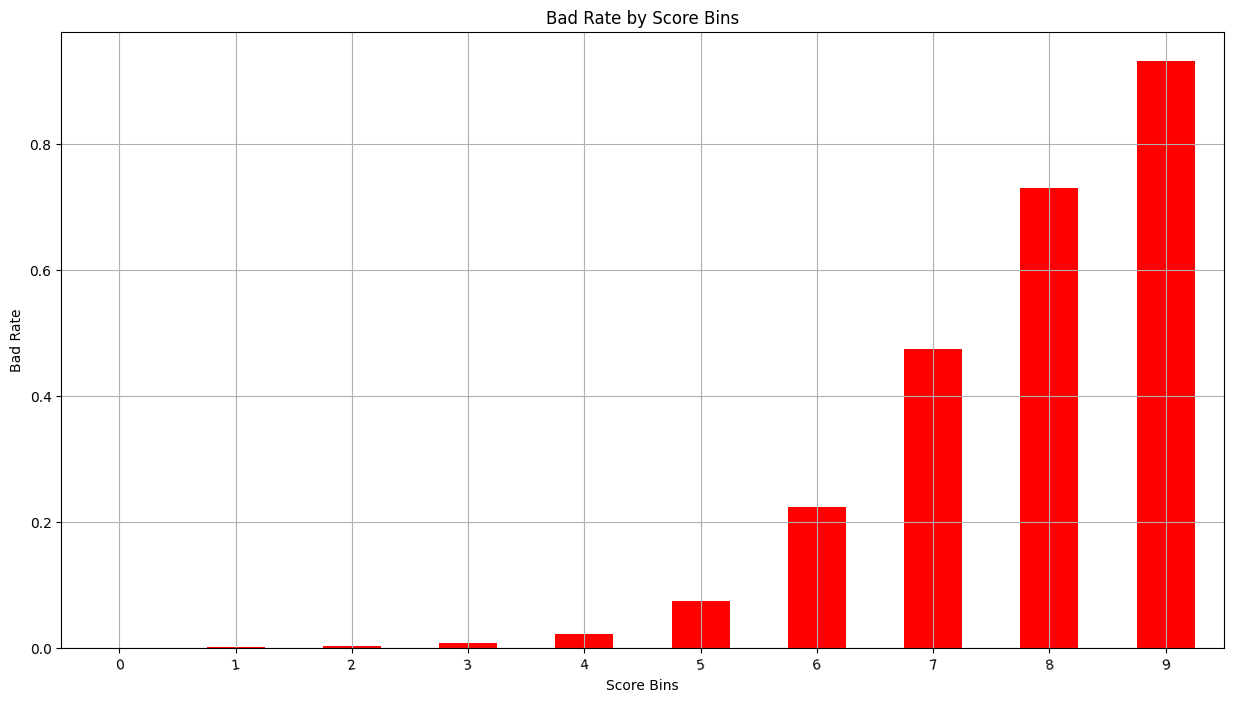

In [85]:
plt.figure(figsize=(15, 8))
statistics['Bad Rate'].plot(kind='bar', color='red')
plt.xlabel("Score Bins")
plt.xticks(rotation=8)
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()

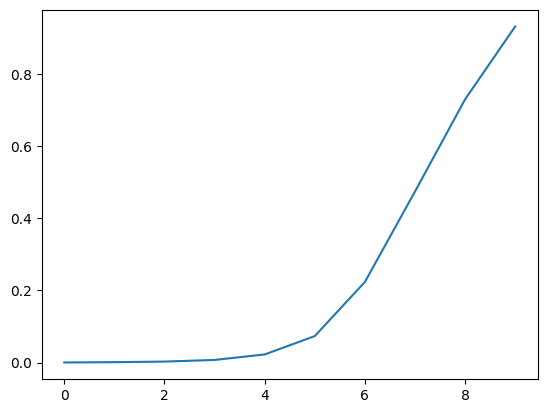

In [86]:
plt.plot(statistics["Bad Rate"])  # statistics["Bad Rate"].plot()

In [87]:
performance1 = pd.DataFrame({"Actual": y_test1, "Prediction": xg_best_model.predict_proba(X_test1)[:,1]})
performance1["Score Bins"] = pd.cut(performance1["Prediction"], quantiles)
statistics1 = performance1.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics1["Bad Rate"] = statistics1["sum"] / statistics1["count"]
statistics1.reset_index(inplace=True)
statistics1.head(1)

/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_11847/2881781687.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics1 = performance1.groupby("Score Bins")["Actual"].agg(["sum", "count"])


,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.0017]",8,16474,0.000486


In [88]:
performance2 = pd.DataFrame({"Actual": y_test2, "Prediction": xg_best_model.predict_proba(X_test2)[:,1]})
performance2["Score Bins"] = pd.cut(performance2["Prediction"], quantiles)
statistics2 = performance2.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics2["Bad Rate"] = statistics2["sum"] / statistics2["count"]
statistics2.reset_index(inplace=True)
statistics2.head(1)

/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_11847/2810508751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics2 = performance2.groupby("Score Bins")["Actual"].agg(["sum", "count"])


,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.0017]",9,16503,0.000545


In [89]:
statistics.head(1)

,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.0017]",14,77496,0.000181


In [90]:
dfs = [statistics, statistics1, statistics2]
bad_scores = [df["Bad Rate"] for df in dfs]
combined_df = pd.concat(bad_scores, axis=1)
combined_df.index = statistics['Score Bins']
combined_df

,Bad Rate,Bad Rate,Bad Rate
Score Bins,,,
"(0.0, 0.0017]",0.000181,0.000486,0.000545
"(0.0017, 0.00357]",0.001007,0.001637,0.001678
"(0.00357, 0.00734]",0.002645,0.003612,0.004702
"(0.00734, 0.0166]",0.007239,0.009420,0.010870
"(0.0166, 0.0458]",0.022414,0.025111,0.026824
"(0.0458, 0.144]",0.073385,0.077989,0.082197
"(0.144, 0.359]",0.223470,0.235931,0.228882
"(0.359, 0.606]",0.474314,0.479497,0.479484
"(0.606, 0.805]",0.730128,0.710940,0.712052


/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_7076/2495444946.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(combined_df.index)


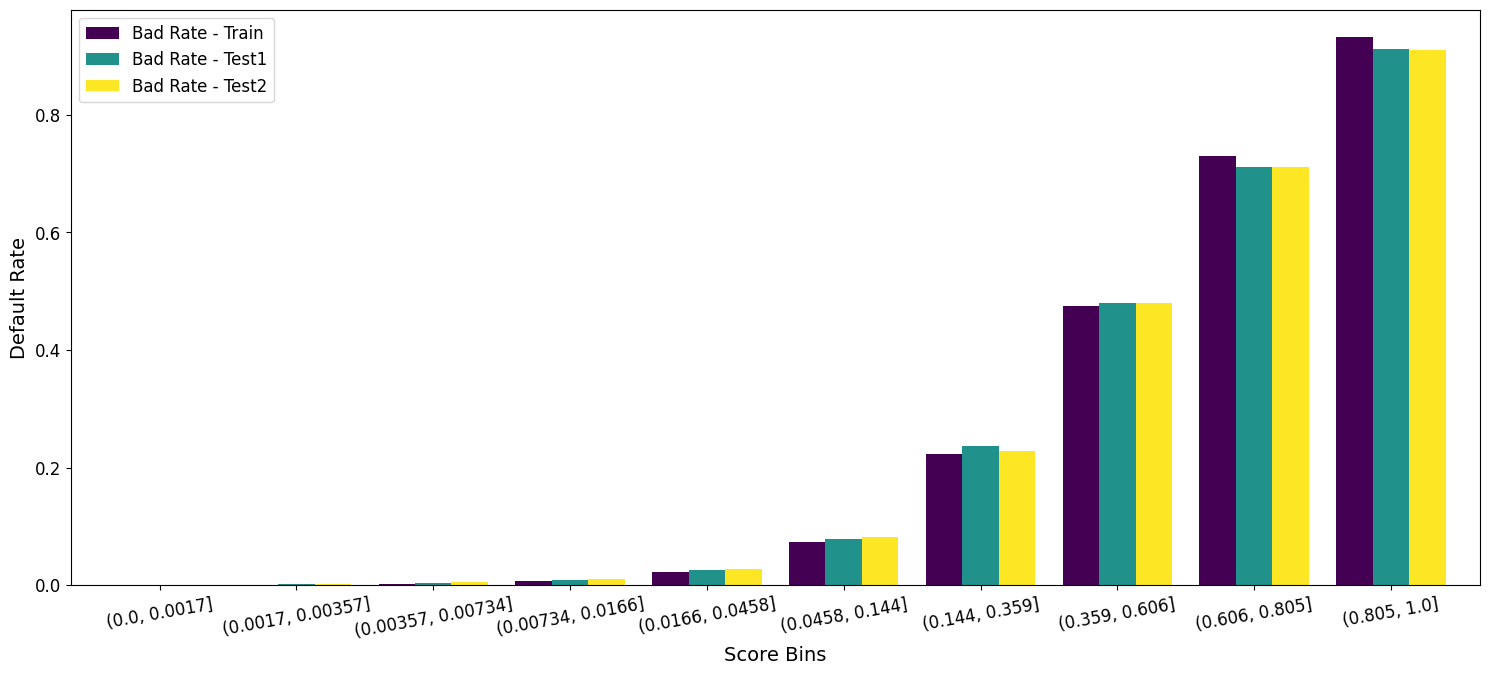

In [211]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xticklabels(combined_df.index)
combined_df.plot(kind='bar', ax=ax, colormap='viridis', width=0.8)
plt.xlabel('Score Bins', fontsize=14)
plt.ylabel('Default Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Bad Rate - Train', 'Bad Rate - Test1', 'Bad Rate - Test2'], fontsize=12)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

In [91]:
results_df

,# Trees,LR,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.927435,0.928070,0.926260
1,50,0.01,80.0%,50.0%,1,0.927495,0.928080,0.926177
2,50,0.01,50.0%,50.0%,5,0.925705,0.926350,0.924694
3,50,0.01,80.0%,50.0%,5,0.925727,0.926286,0.924658
4,50,0.01,50.0%,50.0%,10,0.924745,0.925268,0.923652
...,...,...,...,...,...,...,...,...
67,300,0.10,80.0%,100.0%,1,0.949787,0.943578,0.942172
68,300,0.10,50.0%,100.0%,5,0.948008,0.941920,0.940215
69,300,0.10,80.0%,100.0%,5,0.949237,0.942938,0.941693
70,300,0.10,50.0%,100.0%,10,0.947092,0.941042,0.939713


In [92]:
type(results_df)

pandas.core.frame.DataFrame

In [95]:
'AUC Train' in results_df

True

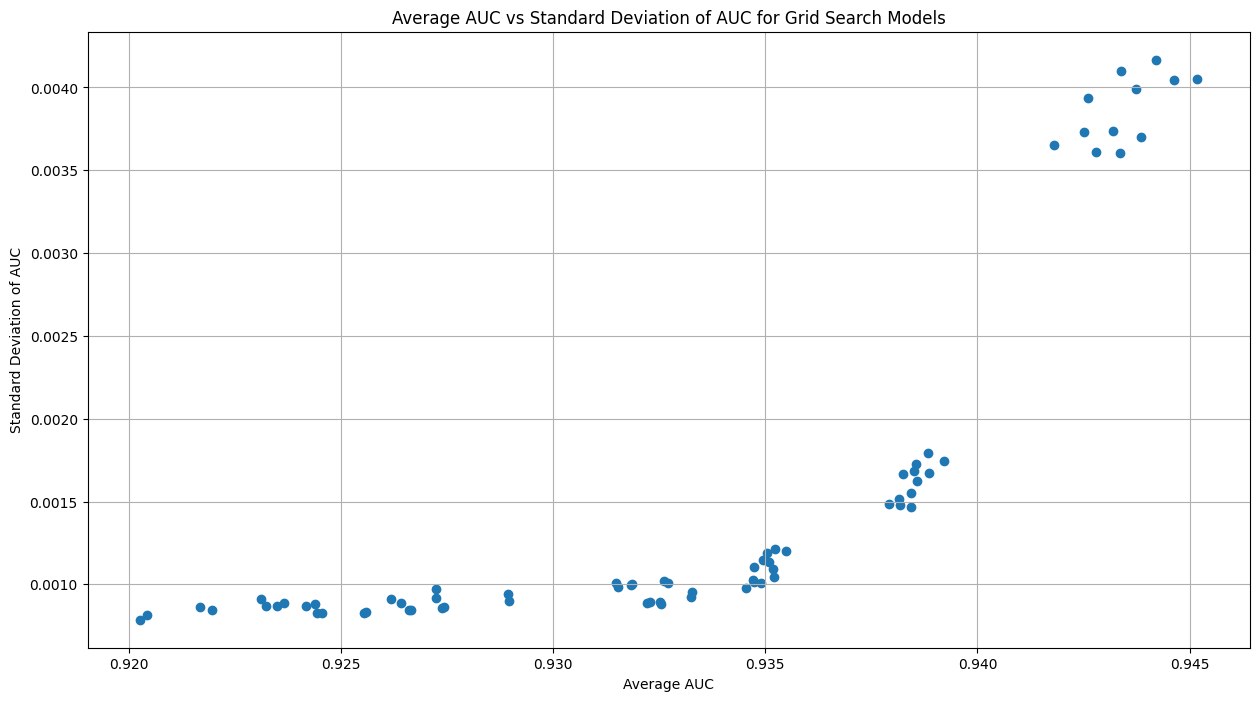

In [97]:
# # Average and standard deviation of AUCs
results_df['Average AUC'] = results_df[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1)
results_df['Standard Deviation AUC'] = results_df[['AUC Train', 'AUC Test 1', 'AUC Test 2']].std(axis=1)

# Plot(s)
# Create scatter plot (Average AUC vs Standard Deviation of AUC for Grid Search Models)
plt.figure(figsize=(15, 8))
plt.scatter(results_df['Average AUC'], results_df['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

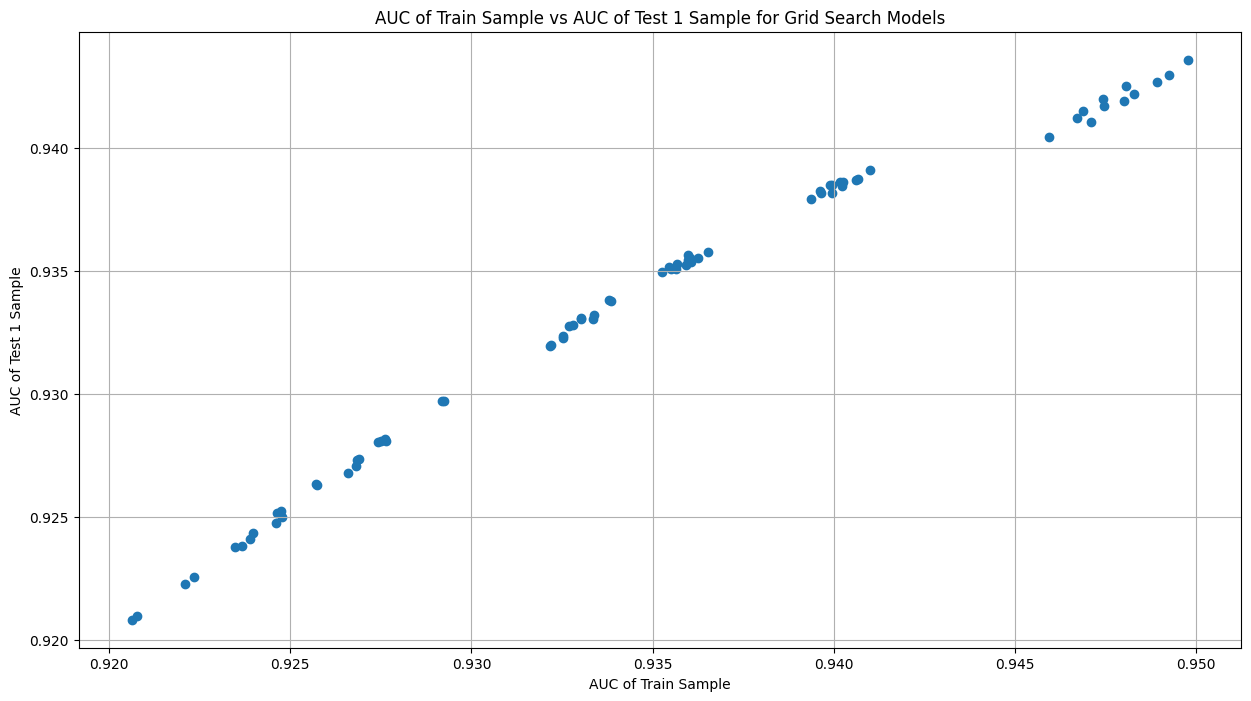

In [120]:
plt.figure(figsize=(15, 8))
plt.scatter(results_df['AUC Train'], results_df['AUC Test 1'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 1 Sample')
plt.title('AUC of Train Sample vs AUC of Test 1 Sample for Grid Search Models')
plt.grid(True)
plt.show()

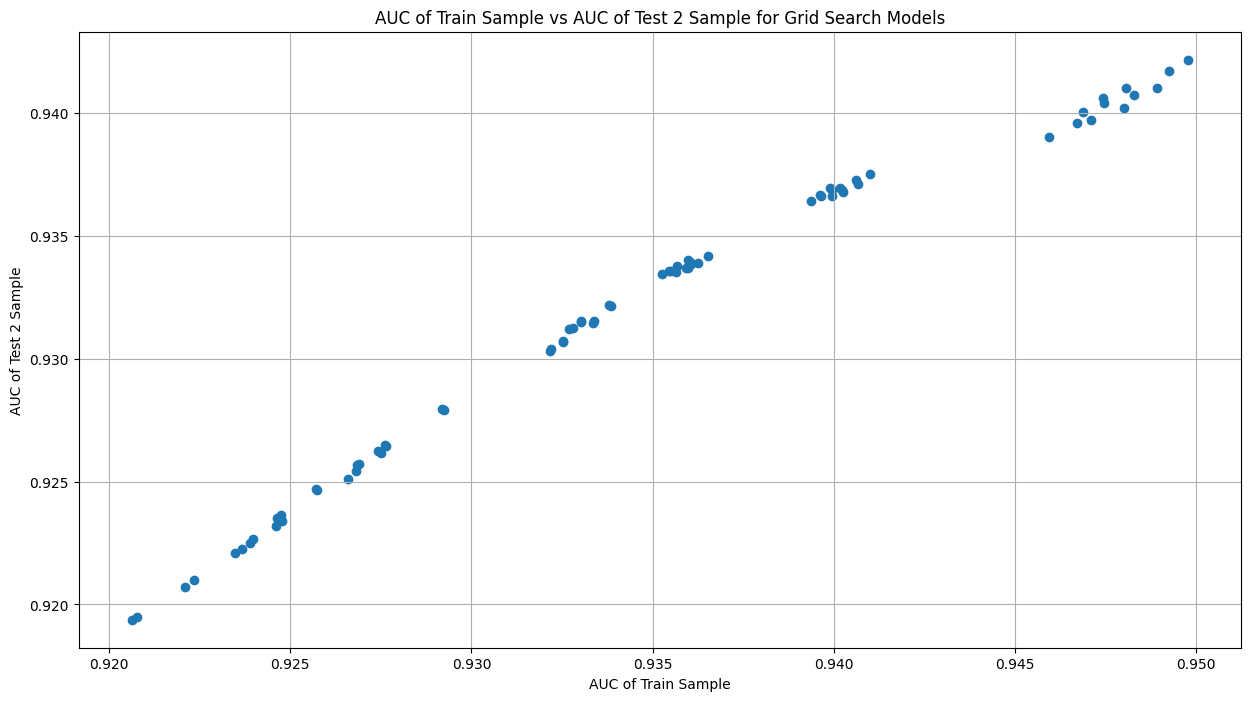

In [122]:
plt.figure(figsize=(15, 8))
plt.scatter(results_df['AUC Train'], results_df['AUC Test 2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()

In [98]:
import shap
shap.initjs()

/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [99]:
explainer = shap.Explainer(xg_best_model)
calc_shap_values = explainer(X_test2)

In [100]:
calc_shap_values

.values =
array([[-6.0526496e-01, -3.1526208e-01, -1.0801424e-02, ...,
        -2.9245256e-02, -3.3849364e-03, -8.1218891e-03],
       [ 9.9623239e-01,  5.0910085e-01,  5.2848935e-02, ...,
        -1.6908444e-02, -3.9771874e-03, -8.9598289e-03],
       [-3.8997042e-01, -2.7641213e-01, -1.3363533e-02, ...,
        -1.7253842e-02, -4.1239448e-03, -1.3450927e-03],
       ...,
       [ 1.4719539e+00,  4.7991094e-01,  1.7804435e-01, ...,
        -1.2963571e-02, -2.8956868e-03, -7.2667790e-03],
       [-1.5171672e+00, -2.8192899e-01,  9.8814033e-03, ...,
        -2.2090424e-02, -7.5614848e-03, -2.3678012e-02],
       [-1.5651848e+00, -2.8835043e-01,  6.9792196e-03, ...,
         4.1512124e-02, -4.2369766e-03, -2.0522811e-02]], dtype=float32)

.base_values =
array([-1.1832032, -1.1832032, -1.1832032, ..., -1.1832032, -1.1832032,
       -1.1832032], dtype=float32)

.data =
array([[7.19217971e-01, 1.47166907e-03, 8.17783995e-01, ...,
        9.39947616e-03, 8.72439029e-01, 0.00000000e+00],
    

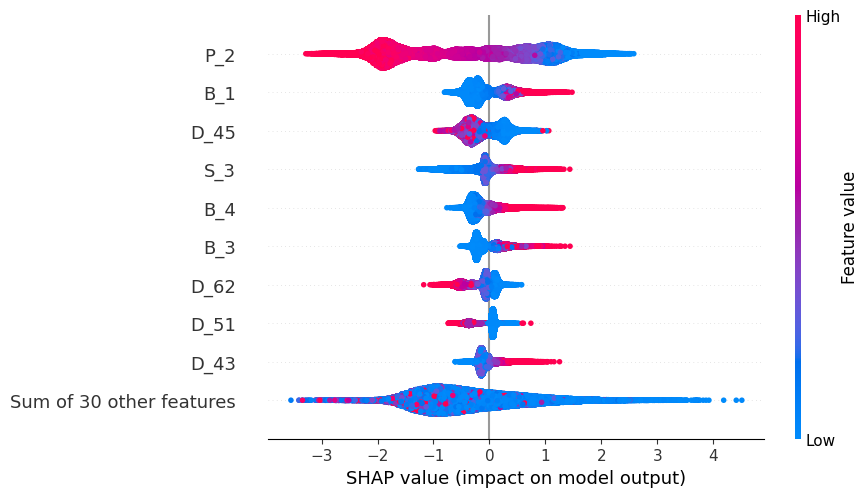

In [101]:
shap.plots.beeswarm(calc_shap_values)

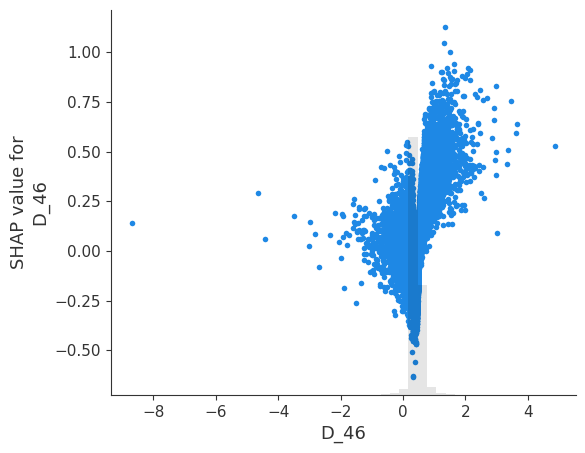

In [102]:
shap.plots.scatter(calc_shap_values[:,"D_46"])

In [103]:
shap.plots.scatter(calc_shap_values[:,"D_46"], color=calc_shap_values[:,"B_11"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

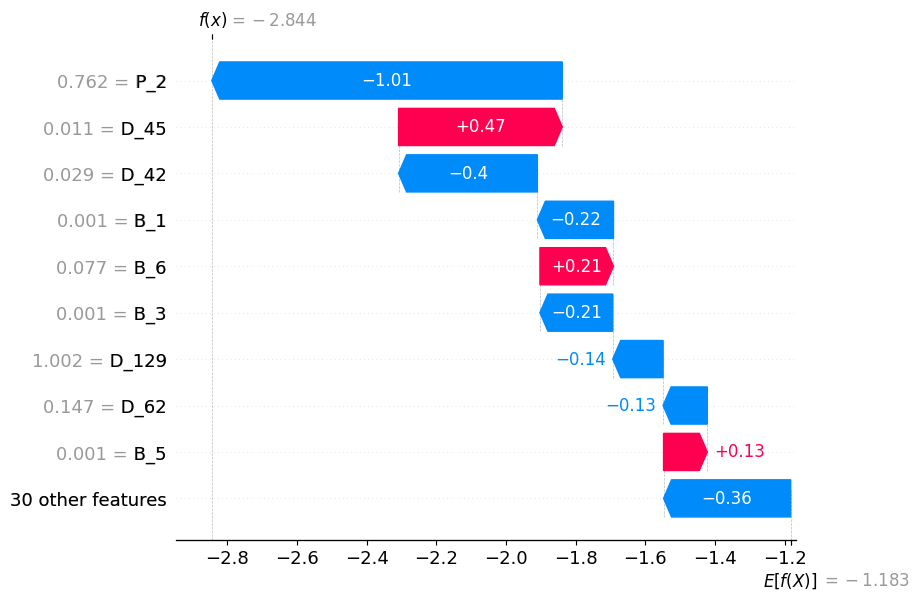

In [104]:
shap.plots.waterfall(calc_shap_values[100])

# Neural Network

In [105]:
print(len(selected_features))
df2.shape

40


(1107082, 40)

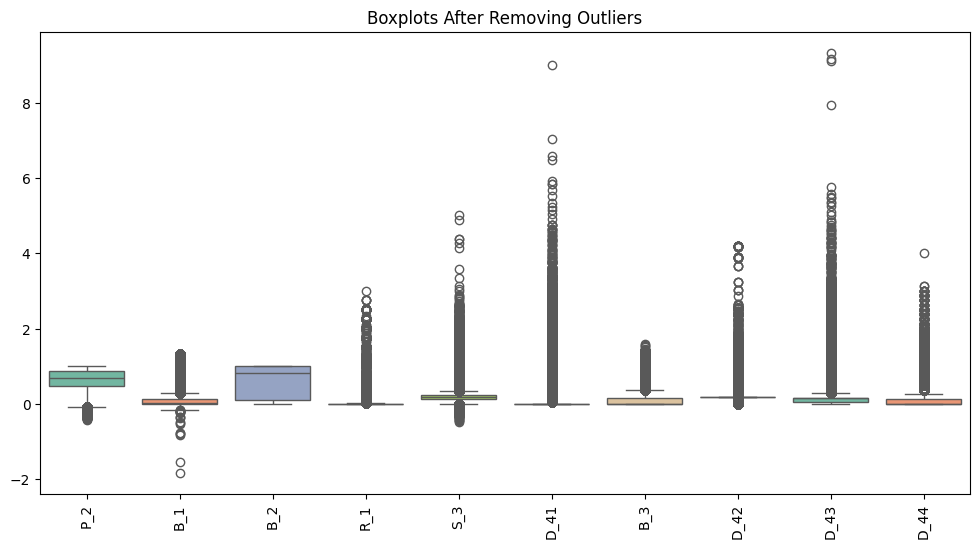

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train[X_train.columns[:10]], orient='v', palette='Set2')
plt.title('Boxplots After Removing Outliers')
plt.xticks(rotation=90)
plt.show()

### Only features used in step 10

In [107]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Find the 1st and 99th percentiles for outlier treatment
Q1 = df2.quantile(0.01)
Q99 = df2.quantile(0.99)

# Cap and floor the values based on the 1st and 99th percentiles
df2 = df2.clip(Q1, Q99, axis=1)

# Replace missing values with 0
df2.fillna(0, inplace=True)

# Apply StandardScaler to normalize the data
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

# Convert the numpy array back to a DataFrame
df2_scaled = pd.DataFrame(df2_scaled, columns=selected_features)

# Display the first few rows of the processed DataFrame
df2_scaled.head()

,P_2,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,...,B_38_2.0,B_38_4.0,D_63_CO,D_64_O,B_8,D_55,P_4,D_111,D_63_CL,target
0,-1.006228,-0.103183,-1.412498,-0.368222,0.710993,-0.289695,0.188300,-0.864214,-0.585080,-0.536099,...,-0.737358,-0.23646,0.588361,-1.140702,1.127623,-0.390113,2.423756,1.887379e-15,-0.294117,-0.571959
1,-0.746680,-0.553257,0.965710,-0.330522,0.285230,-0.300271,-0.022928,0.049915,-0.649924,-0.563615,...,-0.737358,-0.23646,0.588361,-1.140702,1.121363,-0.100744,-0.398159,1.887379e-15,-0.294117,-0.571959
2,-1.012571,-0.045982,-1.407356,-0.368222,0.924629,-0.300506,0.186218,-0.993291,-0.623319,-0.549429,...,-0.737358,-0.23646,0.588361,-1.140702,1.123829,-0.353687,2.439306,1.887379e-15,-0.294117,-0.571959
3,-1.036343,-0.077891,-1.430824,-0.362132,0.687351,-0.281476,0.398247,-0.758180,-0.571255,-0.531352,...,-0.737358,-0.23646,0.588361,-1.140702,1.115795,-0.336801,2.426398,1.887379e-15,-0.294117,-0.571959
4,-0.401462,-0.153084,-1.436904,-0.335239,0.510456,-0.296945,0.374434,-0.857300,-0.502426,-0.557359,...,-0.737358,-0.23646,0.588361,-1.140702,1.125325,-0.341971,2.423462,1.887379e-15,-0.294117,-0.571959


In [108]:
X = df2_scaled.drop(columns=['target'])
y = df2['target']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
X

,P_2,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,...,D_129,B_38_2.0,B_38_4.0,D_63_CO,D_64_O,B_8,D_55,P_4,D_111,D_63_CL
0,-1.006228,-0.103183,-1.412498,-0.368222,0.710993,-0.289695,0.188300,-0.864214,-0.585080,-0.536099,...,-0.888680,-0.737358,-0.23646,0.588361,-1.140702,1.127623,-0.390113,2.423756,1.887379e-15,-0.294117
1,-0.746680,-0.553257,0.965710,-0.330522,0.285230,-0.300271,-0.022928,0.049915,-0.649924,-0.563615,...,-0.875750,-0.737358,-0.23646,0.588361,-1.140702,1.121363,-0.100744,-0.398159,1.887379e-15,-0.294117
2,-1.012571,-0.045982,-1.407356,-0.368222,0.924629,-0.300506,0.186218,-0.993291,-0.623319,-0.549429,...,-0.891737,-0.737358,-0.23646,0.588361,-1.140702,1.123829,-0.353687,2.439306,1.887379e-15,-0.294117
3,-1.036343,-0.077891,-1.430824,-0.362132,0.687351,-0.281476,0.398247,-0.758180,-0.571255,-0.531352,...,-0.885243,-0.737358,-0.23646,0.588361,-1.140702,1.115795,-0.336801,2.426398,1.887379e-15,-0.294117
4,-0.401462,-0.153084,-1.436904,-0.335239,0.510456,-0.296945,0.374434,-0.857300,-0.502426,-0.557359,...,-0.882243,-0.737358,-0.23646,0.588361,-1.140702,1.125325,-0.341971,2.423462,1.887379e-15,-0.294117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107077,1.348455,-0.534890,0.482254,-0.351778,-0.777739,-0.324947,-0.514709,0.049915,-1.010284,-0.566249,...,1.150601,-0.737358,-0.23646,-1.699638,0.876654,-0.902627,-0.972204,-0.407402,1.887379e-15,3.400010
1107078,1.293965,-0.551085,0.951549,-0.343605,-0.769444,-0.276912,-0.531008,0.049915,-0.956419,-0.545446,...,1.154393,-0.737358,-0.23646,-1.699638,0.876654,-0.902910,-0.982514,-0.415841,1.887379e-15,3.400010
1107079,1.418987,-0.154915,-0.955575,-0.353424,-1.345629,-0.306284,-0.264041,0.049915,-0.981323,-0.562584,...,1.162370,-0.737358,-0.23646,-1.699638,-1.140702,-0.900632,-0.845392,-0.397179,1.887379e-15,3.400010
1107080,1.333928,-0.487987,-0.162353,-0.324999,-0.834785,-0.332511,-0.371277,0.049915,-0.996394,-0.569266,...,1.162068,-0.737358,-0.23646,-1.699638,0.876654,-0.895134,-0.929101,-0.422149,1.887379e-15,3.400010


In [110]:
X_train

,P_2,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,...,D_129,B_38_2.0,B_38_4.0,D_63_CO,D_64_O,B_8,D_55,P_4,D_111,D_63_CL
891520,-0.791704,2.267829,-1.493082,-0.343522,-0.317207,-0.302243,3.331441,0.049915,1.962585,0.052731,...,1.159599,-0.737358,-0.236460,0.588361,0.876654,1.126138,1.255153,-0.402479,1.887379e-15,-0.294117
934937,-0.426348,2.424504,-1.434197,0.909002,-0.543169,-0.297723,1.244350,0.049915,0.030355,4.441630,...,1.151103,-0.737358,-0.236460,-1.699638,0.876654,-0.905086,1.551357,-0.422878,1.887379e-15,3.400010
977160,1.100615,-0.514120,0.956452,-0.331979,-0.831351,-0.319269,-0.540213,0.049915,-0.630865,-0.539168,...,-0.879616,1.356194,-0.236460,-1.699638,0.876654,-0.897658,-0.923673,-0.421382,1.887379e-15,-0.294117
848997,-0.298520,-0.591578,0.964164,-0.333038,1.251394,-0.290245,-0.553164,-2.492194,0.230206,-0.545995,...,-0.890679,1.356194,-0.236460,0.588361,0.876654,1.115225,-1.040480,2.435662,1.887379e-15,-0.294117
676464,0.967192,-0.597106,0.490533,-0.322307,0.013450,-0.301630,-0.547156,0.049915,-0.551042,-0.551702,...,-0.876207,1.356194,-0.236460,0.588361,0.876654,-0.891491,-0.655899,-0.418952,1.887379e-15,-0.294117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.338743,-0.313732,0.598489,-0.334176,-0.792547,-0.282146,-0.515548,0.049915,-0.849387,-0.567934,...,1.151034,-0.737358,-0.236460,-1.699638,-1.140702,-0.895607,-0.639979,-0.423008,1.887379e-15,3.400010
259178,-0.658689,-0.126343,0.491485,-0.351582,2.280081,-0.314898,-0.530108,-2.167073,-0.325741,0.686305,...,-0.888034,-0.737358,4.229039,0.588361,0.876654,1.113803,-0.509143,2.424650,1.887379e-15,-0.294117
131932,-2.217083,0.677574,-1.369829,4.583497,2.970199,-0.292570,1.486413,0.049915,-0.299416,0.088718,...,-0.876030,-0.737358,-0.236460,-1.699638,-1.140702,-0.889140,1.326929,-0.407841,1.887379e-15,3.400010
671155,-0.328573,-0.554567,0.946095,0.877748,-0.980976,-0.322856,-0.557668,0.049915,-0.251495,-0.554743,...,-0.873359,1.356194,-0.236460,0.588361,0.876654,-0.893698,-1.039771,-0.402535,1.887379e-15,-0.294117


In [111]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
results_NN = pd.DataFrame(columns=['# HL', '# Node', 'Activation Function', 'Dropout', 'Batch Size', 'AUC Train', 'AUC Test 1', 'AUC Test 2'])

# hyperparameters
n_layers_values = [2, 4]
n_nodes_values = [4, 6]
activation_functions = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]  # 50% dropout and no dropout
batch_sizes = [100, 10000]
epochs = 20

# Loop over each number of hidden layers
for n_layers in n_layers_values:
    for n_node in n_nodes_values:
        for activation in activation_functions:
            for dropout in dropout_rates:
                for batch_size in batch_sizes:
                    # Build and compile the model
                    model = tf.keras.models.Sequential()
                    model.add(tf.keras.layers.Dense(n_node, activation=activation, input_shape=(X_train.shape[1],)))
                    for _ in range(n_layers - 1):
                        model.add(tf.keras.layers.Dense(n_node, activation=activation))
                        if dropout < 1.0:
                            model.add(tf.keras.layers.Dropout(dropout))
                    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
                    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])
                    # Train the model
                    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Evaluate the model
                    auc_train = roc_auc_score(y_train, model.predict(X_train))
                    auc_test1 = roc_auc_score(y_test1, model.predict(X_test1))
                    auc_test2 = roc_auc_score(y_test2, model.predict(X_test2))

                    # Create a DataFrame from the results
                    result_dict = {
                        '# HL': n_layers,
                        '# Node': n_node,
                        'Activation Function': activation,
                        'Dropout': f"{int((1 - dropout) * 100)}%",
                        'Batch Size': batch_size,
                        'AUC Train': auc_train,
                        'AUC Test 1': auc_test1,
                        'AUC Test 2': auc_test2
                    }

                    result_NN = pd.DataFrame([result_dict])

                    # Concatenate the DataFrame to results_df
                    results_NN = pd.concat([results_NN, result_NN], ignore_index=True)

                    # Save the results after each iteration
                    results_NN.to_csv('grid_search_results.csv', index=False)

                    print(f"Model with {n_layers} layers, {n_node} nodes per layer, {activation} activation, "
                          f"{int((1 - dropout) * 100)}% dropout, and batch size {batch_size} finished training. "
                          f"Train AUC: {auc_train}, Test AUC 1: {auc_test1}, Test AUC 2: {auc_test2}")

/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 189us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 195us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 189us/step


/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_11847/61637086.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_NN = pd.concat([results_NN, result_NN], ignore_index=True)
/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9263015872295897, Test AUC 1: 0.9187098977799207, Test AUC 2: 0.9161393971259615
24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 195us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 190us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 191us/step
Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.9306703463538887, Test AUC 1: 0.9206291581374625, Test AUC 2: 0.9192437148650178


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 203us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 193us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 193us/step
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9324578537811645, Test AUC 1: 0.9131760820151891, Test AUC 2: 0.911933781239454


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 199us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 195us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 194us/step
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.9312489542066467, Test AUC 1: 0.9220392497265084, Test AUC 2: 0.9204633453372439


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 207us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 196us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 193us/step
Model with 2 layers, 4 nodes per layer, tanh activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9324901289180902, Test AUC 1: 0.9173497511874592, Test AUC 2: 0.9158725558953091


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 192us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 192us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 194us/step
Model with 2 layers, 4 nodes per layer, tanh activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.9301653403432245, Test AUC 1: 0.924709716399842, Test AUC 2: 0.9232046963925351


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 193us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 194us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 191us/step
Model with 2 layers, 4 nodes per layer, tanh activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.932331484984512, Test AUC 1: 0.9095875076963588, Test AUC 2: 0.908354552641589


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 194us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 205us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 194us/step
Model with 2 layers, 4 nodes per layer, tanh activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.9303674224977242, Test AUC 1: 0.922340055342132, Test AUC 2: 0.9209337422668386


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 194us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 195us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 193us/step
Model with 2 layers, 6 nodes per layer, relu activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9332768784307087, Test AUC 1: 0.9096611827620783, Test AUC 2: 0.9082001382761287


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 207us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 194us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 192us/step
Model with 2 layers, 6 nodes per layer, relu activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.9309839502705852, Test AUC 1: 0.925054303150612, Test AUC 2: 0.9236259186895701


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 198us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 199us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 191us/step
Model with 2 layers, 6 nodes per layer, relu activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.933464478782956, Test AUC 1: 0.9081132824591939, Test AUC 2: 0.9068072456722649


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 199us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 196us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 193us/step
Model with 2 layers, 6 nodes per layer, relu activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.9312285354121587, Test AUC 1: 0.9231737215397026, Test AUC 2: 0.9217319826771753


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 193us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 195us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 194us/step
Model with 2 layers, 6 nodes per layer, tanh activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9330530534735457, Test AUC 1: 0.9209678136917971, Test AUC 2: 0.9197128971106644


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 196us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 192us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 194us/step
Model with 2 layers, 6 nodes per layer, tanh activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.9311134893513926, Test AUC 1: 0.9247762590797918, Test AUC 2: 0.9231119398100326


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 203us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 227us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 190us/step
Model with 2 layers, 6 nodes per layer, tanh activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9338541853380614, Test AUC 1: 0.9079931803543473, Test AUC 2: 0.9065327760233048


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 191us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 192us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 191us/step
Model with 2 layers, 6 nodes per layer, tanh activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.9311673819689292, Test AUC 1: 0.9114745748686759, Test AUC 2: 0.910015372748654


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 200us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 198us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 197us/step
Model with 4 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9127383717253749, Test AUC 1: 0.9171559457409528, Test AUC 2: 0.915447289176289


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 202us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 201us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 199us/step
Model with 4 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.9305872583393614, Test AUC 1: 0.9250054400756419, Test AUC 2: 0.9235734154187171


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 200us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 204us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 200us/step
Model with 4 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9322750671459868, Test AUC 1: 0.9209574548157873, Test AUC 2: 0.9191951163748566


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 199us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 199us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 198us/step
Model with 4 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.9315694003606582, Test AUC 1: 0.9241018588275114, Test AUC 2: 0.9228649717813754


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 200us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 202us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 198us/step
Model with 4 layers, 4 nodes per layer, tanh activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9318675043980644, Test AUC 1: 0.9200582827553536, Test AUC 2: 0.9187089136132967


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 215us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 202us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 199us/step
Model with 4 layers, 4 nodes per layer, tanh activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.9293591658587199, Test AUC 1: 0.9240610738657775, Test AUC 2: 0.9223172207039134


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 201us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 202us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 200us/step
Model with 4 layers, 4 nodes per layer, tanh activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9326451771964948, Test AUC 1: 0.9194864526444408, Test AUC 2: 0.9182572376009004


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 202us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 197us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 196us/step
Model with 4 layers, 4 nodes per layer, tanh activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.9306058632344507, Test AUC 1: 0.9240951772913346, Test AUC 2: 0.9222680212679353


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 200us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 202us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 200us/step
Model with 4 layers, 6 nodes per layer, relu activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9246947733253625, Test AUC 1: 0.6901044945020591, Test AUC 2: 0.6878221376935608


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 202us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 204us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 204us/step
Model with 4 layers, 6 nodes per layer, relu activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.916532416797078, Test AUC 1: 0.9187973342271718, Test AUC 2: 0.9175183982530425


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 201us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 201us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 200us/step
Model with 4 layers, 6 nodes per layer, relu activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9337279186304535, Test AUC 1: 0.9007366175156755, Test AUC 2: 0.8992982982052315


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 217us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 240us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 202us/step
Model with 4 layers, 6 nodes per layer, relu activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.9293638978660262, Test AUC 1: 0.9238160238056852, Test AUC 2: 0.9223023293759415


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 6s 231us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 200us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 201us/step
Model with 4 layers, 6 nodes per layer, tanh activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9325120069031705, Test AUC 1: 0.9133367987412443, Test AUC 2: 0.9114607710646523


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 205us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 201us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 201us/step
Model with 4 layers, 6 nodes per layer, tanh activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.9309324742666694, Test AUC 1: 0.924697427911056, Test AUC 2: 0.9231534571195132


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 207us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 200us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 205us/step
Model with 4 layers, 6 nodes per layer, tanh activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9332744516162478, Test AUC 1: 0.9006075361854504, Test AUC 2: 0.8990470911356401


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 5s 216us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 204us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 1s 203us/step
Model with 4 layers, 6 nodes per layer, tanh activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.930693702766456, Test AUC 1: 0.9231392094338612, Test AUC 2: 0.9215917491291632


In [129]:
results_NN

,# HL,# Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2
0,2,4,relu,50%,100,0.926302,0.918710,0.916139
1,2,4,relu,50%,10000,0.930670,0.920629,0.919244
2,2,4,relu,0%,100,0.932458,0.913176,0.911934
3,2,4,relu,0%,10000,0.931249,0.922039,0.920463
4,2,4,tanh,50%,100,0.932490,0.917350,0.915873
5,2,4,tanh,50%,10000,0.930165,0.924710,0.923205
6,2,4,tanh,0%,100,0.932331,0.909588,0.908355
7,2,4,tanh,0%,10000,0.930367,0.922340,0.920934
8,2,6,relu,50%,100,0.933277,0.909661,0.908200
9,2,6,relu,50%,10000,0.930984,0.925054,0.923626


In [131]:
result_NN['AUC Test 1']

0    0.923139
Name: AUC Test 1, dtype: float64

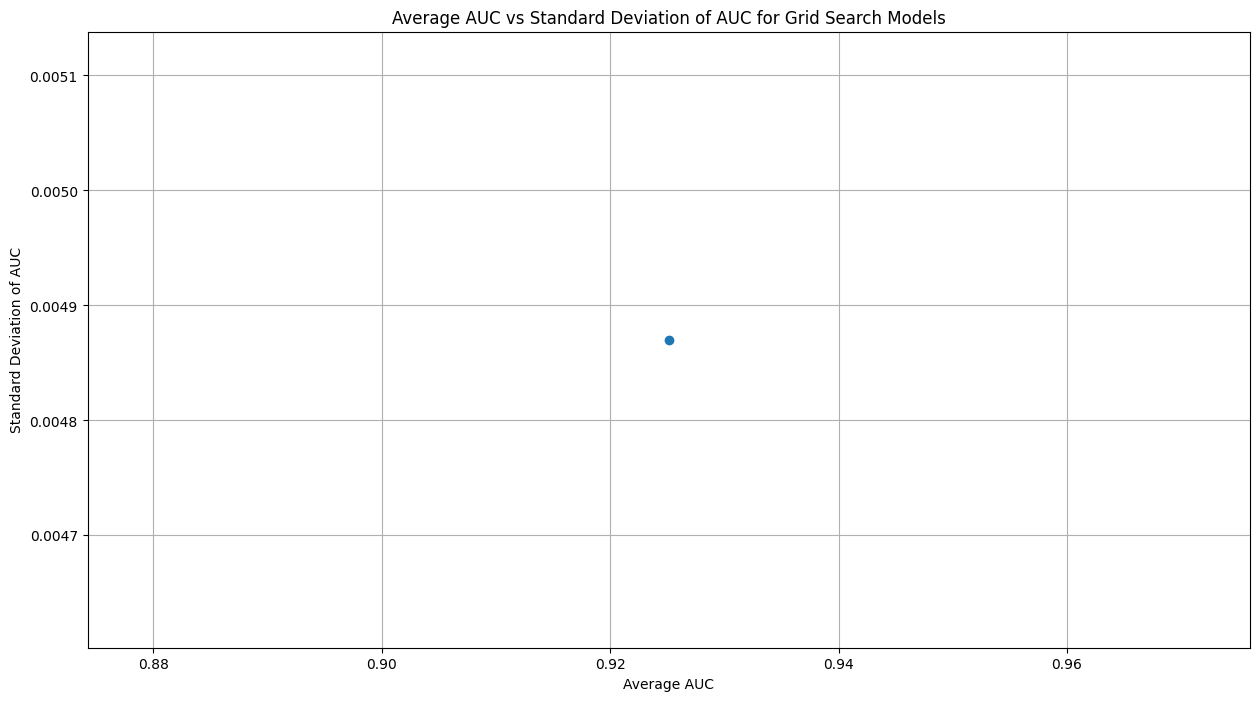

In [134]:
result_NN['Average AUC'] = result_NN[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1)
result_NN['Standard Deviation AUC'] = result_NN[['AUC Train', 'AUC Test 1', 'AUC Test 2']].std(axis=1)
# plt.figure(figsize=(10, 5))
# plt.scatter(result_NN['Average AUC'], result_NN['Standard Deviation AUC'])
# plt.xlabel('Average AUC')
# plt.ylabel('Standard Deviation of AUC')
# plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
# plt.grid(True)
# plt.show()


plt.figure(figsize=(15, 8))
plt.scatter(result_NN['Average AUC'], result_NN['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

In [132]:
result_NN['Average AUC']

0    0.925142
Name: Average AUC, dtype: float64

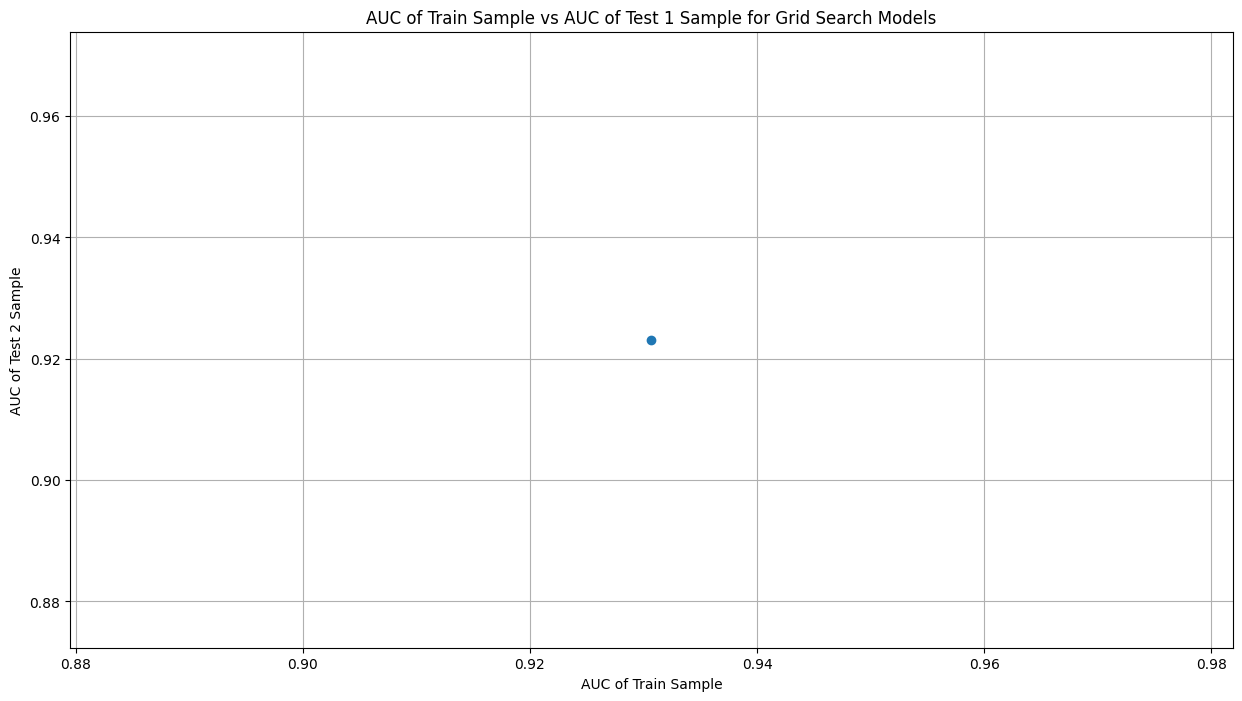

In [128]:
plt.figure(figsize=(15, 8))
plt.scatter(result_NN['AUC Train'], result_NN['AUC Test 1'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 1 Sample for Grid Search Models')
plt.grid(True)
plt.show()

# Identifying best model

In [113]:
# highest AUC Test score
best_model_select = results_NN.loc[results_NN['AUC Test 1'].idxmax()]
best_model_select

# HL                          2
# Node                        6
Activation Function        relu
Dropout                     50%
Batch Size                10000
AUC Train              0.930984
AUC Test 1             0.925054
AUC Test 2             0.923626
Name: 9, dtype: object

In [114]:
# Parameters of the best model
best_n_layers = int(best_model_select['# HL'])
best_n_nodes = int(best_model_select['# Node'])
best_activation = best_model_select['Activation Function']
best_dropout = float(best_model_select['Dropout'].strip('%')) / 100.0
best_batch_size = int(best_model_select['Batch Size'])

# re-running model with optimum features

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create the best model with optimum parameters
final_nn_model = Sequential()
final_nn_model.add(Dense(best_n_nodes, activation=best_activation, input_shape=(X_train.shape[1],)))
for _ in range(best_n_layers - 1):
    final_nn_model.add(Dense(best_n_nodes, activation=best_activation))
    if best_dropout < 1.0:
        final_nn_model.add(Dropout(best_dropout))
final_nn_model.add(Dense(1, activation='sigmoid'))

# Compile the best model
final_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

# Train the best model on the entire training set
final_nn_model.fit(X_train, y_train, epochs=20, batch_size=best_batch_size, verbose=1)

# Save the final model in native Keras format
final_nn_model.save('final_nn_model.keras')

Epoch 1/20


/Users/prathyushmaniyam/Desktop/creditrisk2/project2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5733 - loss: 0.8063 
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6953 - loss: 0.6799
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7441 - loss: 0.6456
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7855 - loss: 0.6198
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8192 - loss: 0.5865
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8539 - loss: 0.4893
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8644 - loss: 0.4438
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8698 - loss: 0.4321
Epoch 9/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8727 - loss: 0.4244
Epoch 10/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8752 - loss: 0.4189
Epoch 11/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8771 - loss: 0.4123
Epoch 12/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8783 - loss: 0.4081
Epoch 13/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0

# Choosing best model among XBG and NN

In [116]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Load the trained NN model
from tensorflow.keras.models import load_model
final_nn_model = load_model('final_nn_model.keras')

# Load the trained XGBoost model
import xgboost as xgb
final_xgb_model = xgb.Booster(model_file='xgb_best_model.json')

# Make predictions using the NN model
nn_predictions = final_nn_model.predict(X_test)
nn_auc = roc_auc_score(y_test, nn_predictions)

# Make predictions using the XGB model
xgb_predictions = final_xgb_model.predict(xgb.DMatrix(X_test))
xgb_auc = roc_auc_score(y_test, xgb_predictions)

# Compare models based on ROC AUC
if nn_auc > xgb_auc:
    best_model = "NN"
    best_auc = nn_auc
else:
    best_model = "XGB"
    best_auc = xgb_auc

# results
print(f'ROC AUC - NN Model: {nn_auc:.4f}')
print(f'ROC AUC - XGBoost Model: {xgb_auc:.4f}')
print(f'Best Model: {best_model} (ROC AUC = {best_auc:.4f})')

# Save the best model
if best_model == "NN":
    final_nn_model.save('best_model.h5')
else:
    final_xgb_model.save_model('xgb_best_model.json')

10379/10379 ━━━━━━━━━━━━━━━━━━━━ 2s 197us/step


ROC AUC - NN Model: 0.9312
ROC AUC - XGBoost Model: 0.8533
Best Model: NN (ROC AUC = 0.9312)


In [135]:
df2.head()

,P_2,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,...,B_38_2.0,B_38_4.0,D_63_CO,D_64_O,B_8,D_55,P_4,D_111,D_63_CL,target
92994,0.414444,0.100998,0.055903,0.000116,0.333741,0.007850,0.174713,0.132976,0.066931,0.008378,...,0,0,1,0,1.008682,0.186995,0.957622,0.872439,0,0
92996,0.477116,0.009413,1.009217,0.007775,0.267037,0.006128,0.125927,0.185299,0.057729,0.002877,...,0,0,1,0,1.005579,0.268703,0.008624,0.872439,0,0
92993,0.412912,0.112638,0.057964,0.000116,0.367211,0.006090,0.174232,0.125588,0.061504,0.005713,...,0,0,1,0,1.006801,0.197281,0.962851,0.872439,0,0
92992,0.407172,0.106145,0.048557,0.001353,0.330037,0.009187,0.223204,0.139045,0.068893,0.009326,...,0,0,1,0,1.002818,0.202049,0.958510,0.872439,0,0
92991,0.560474,0.090844,0.046120,0.006817,0.302323,0.006669,0.217704,0.133372,0.078660,0.004128,...,0,0,1,0,1.007543,0.200589,0.957523,0.872439,0,0


In [118]:
# Check if 'B_1_x' is in the columns of df2
if 'B_1_x' in df2.columns:
    print("'B_1_x' is present in df2")
else:
    print("'B_1_x' is not present in df2")


'B_1_x' is not present in df2


In [136]:
df2

,P_2,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,...,B_38_2.0,B_38_4.0,D_63_CO,D_64_O,B_8,D_55,P_4,D_111,D_63_CL,target
92994,0.414444,0.100998,0.055903,0.000116,0.333741,0.007850,0.174713,0.132976,0.066931,0.008378,...,0,0,1,0,1.008682,0.186995,0.957622,0.872439,0,0
92996,0.477116,0.009413,1.009217,0.007775,0.267037,0.006128,0.125927,0.185299,0.057729,0.002877,...,0,0,1,0,1.005579,0.268703,0.008624,0.872439,0,0
92993,0.412912,0.112638,0.057964,0.000116,0.367211,0.006090,0.174232,0.125588,0.061504,0.005713,...,0,0,1,0,1.006801,0.197281,0.962851,0.872439,0,0
92992,0.407172,0.106145,0.048557,0.001353,0.330037,0.009187,0.223204,0.139045,0.068893,0.009326,...,0,0,1,0,1.002818,0.202049,0.958510,0.872439,0,0
92991,0.560474,0.090844,0.046120,0.006817,0.302323,0.006669,0.217704,0.133372,0.078660,0.004128,...,0,0,1,0,1.007543,0.200589,0.957523,0.872439,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446180,0.983019,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,0.185299,0.006591,0.002350,...,0,0,0,1,0.002050,0.022632,0.005516,0.872439,1,0
446181,0.969861,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,0.185299,0.014235,0.006509,...,0,0,0,1,0.001910,0.019721,0.002678,0.872439,1,0
446171,1.000050,0.090471,0.239062,0.003122,0.011532,0.005149,0.070238,0.185299,0.010701,0.003083,...,0,0,0,0,0.003039,0.058440,0.008954,0.872439,1,0
446177,0.979511,0.022695,0.557029,0.008897,0.091565,0.000880,0.045471,0.185299,0.008562,0.001747,...,0,0,0,1,0.005766,0.034803,0.000556,0.872439,1,0


## Conservative and Aggressive strategy

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def calculate_portfolio_metrics(data, target_var, model_output, monthly_balance, monthly_spend, threshold):
    # Calculate average balance and spend
    B_Ave = data[monthly_balance].mean()
    S_Ave = data[monthly_spend].mean()

    # Calculate Monthly Revenue for each customer and Total Revenue
    data['Monthly_Revenue'] = B_Ave * 0.02 + S_Ave * 0.001
    data['Total_Revenue_12_Months'] = data['Monthly_Revenue'] * 12

    # Determine accepted loans based on the threshold
    accepted = data[data[model_output] < threshold]

    # Calculate default rate and total annual revenue for the portfolio
    default_rate = accepted[target_var].mean()
    revenue = accepted['Total_Revenue_12_Months'].sum()

    return default_rate, revenue

# Assume that 'target_x' is your target variable and all other columns are your features
# Also drop the 'customer_ID' column
# import os
# df2.to_csv(os.path.join(os.getcwd(), "nan.csv"), index=False)

features = df2.drop(['target'], axis=1)
target = df2['target']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

train_data = X_train.copy()
train_data['target'] = y_train
train_data['PD'] = clf.predict_proba(X_train)[:, 1]

# Assuming 'B_1' and 'S_3' are your estimated monthly balance and spend variables
monthly_balance = 'B_1'
monthly_spend = 'S_3'

# Define the range of thresholds to test
thresholds = np.linspace(0, 1, 101)

# Initialize best metrics
best_conservative_metrics = (0, 0)
best_aggressive_metrics = (0, 0)
conservative_threshold = 0
aggressive_threshold = 0

# Iterate over thresholds
for threshold in thresholds:
    # Calculate portfolio metrics
    default_rate, revenue = calculate_portfolio_metrics(train_data, 'target', 'PD', monthly_balance, monthly_spend, threshold)

    # Update best conservative metrics
    if default_rate <= 0.05 and revenue > best_conservative_metrics[1]:
        best_conservative_metrics = (default_rate, revenue)
        conservative_threshold = threshold

    # Update best aggressive metrics
    if default_rate <= 0.10 and revenue > best_aggressive_metrics[1]:
        best_aggressive_metrics = (default_rate, revenue)
        aggressive_threshold = threshold

# Print the best thresholds and their metrics
print(f"Conservative strategy (threshold = {conservative_threshold}): Default rate = {best_conservative_metrics[0]}, Revenue = {best_conservative_metrics[1]}")
print(f"Aggressive strategy (threshold = {aggressive_threshold}): Default rate = {best_aggressive_metrics[0]}, Revenue = {best_aggressive_metrics[1]}")


Conservative strategy (threshold = 0.8): Default rate = 0.04888666553133515, Revenue = 21012.975388566647
Aggressive strategy (threshold = 0.86): Default rate = 0.09536047436546388, Revenue = 22092.469456172767


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def calculate_portfolio_metrics(data, target_var, model_output, monthly_balance, monthly_spend, threshold):
    # Calculate average balance and spend
    B_Ave = data[monthly_balance].mean()
    S_Ave = data[monthly_spend].mean()

    # Calculate Monthly Revenue for each customer and Total Revenue
    data['Monthly_Revenue'] = B_Ave * 0.02 + S_Ave * 0.001
    data['Total_Revenue_12_Months'] = data['Monthly_Revenue'] * 12

    # Determine accepted loans based on the threshold
    accepted = data[data[model_output] < threshold]

    # Calculate default rate and total annual revenue for the portfolio
    default_rate = accepted[target_var].mean()
    revenue = accepted['Total_Revenue_12_Months'].sum()

    return default_rate, revenue

# Assume that 'target_x' is your target variable and all other columns are your features
# Also drop the 'customer_ID' column
# import os
# df2.to_csv(os.path.join(os.getcwd(), "nan.csv"), index=False)

features = df2.drop(['target'], axis=1)
target = df2['target']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

train_data = X_train.copy()
train_data['target'] = y_train
train_data['PD'] = clf.predict_proba(X_train)[:, 1]

# Assuming 'B_1' and 'S_3' are your estimated monthly balance and spend variables
monthly_balance = 'B_1'
monthly_spend = 'S_3'

# Define the range of thresholds to test
thresholds = np.linspace(0, 1, 101)

# Initialize best metrics
best_conservative_metrics = (0, 0)
best_aggressive_metrics = (0, 0)
conservative_threshold = 0
aggressive_threshold = 0

# Iterate over thresholds
for threshold in thresholds:
    # Calculate portfolio metrics
    default_rate, revenue = calculate_portfolio_metrics(train_data, 'target', 'PD', monthly_balance, monthly_spend, threshold)
    print(threshold,default_rate, revenue)

    # Update best conservative metrics
    if default_rate <= 0.05 and revenue > best_conservative_metrics[1]:
        best_conservative_metrics = (default_rate, revenue)
        conservative_threshold = threshold

    # Update best aggressive metrics
    if default_rate <= 0.10 and revenue > best_aggressive_metrics[1]:
        best_aggressive_metrics = (default_rate, revenue)
        aggressive_threshold = threshold

# Print the best thresholds and their metrics
print(f"Conservative strategy (threshold = {conservative_threshold}): Default rate = {best_conservative_metrics[0]}, Revenue = {best_conservative_metrics[1]}")
print(f"Aggressive strategy (threshold = {aggressive_threshold}): Default rate = {best_aggressive_metrics[0]}, Revenue = {best_aggressive_metrics[1]}")


0.0 nan 0.0
0.01 0.0 9235.224154298943
0.02 0.0 11915.36388297367
0.03 0.0 13247.845401811226
0.04 0.0 14117.901133622696
0.05 0.0 14766.728637052445
0.06 0.0 15288.870709295956
0.07 0.0 15726.72623236688
0.08 0.0 16112.054429114938
0.09 0.0 16456.64519212719
0.1 0.0 16767.08041265821
0.11 0.0 17056.300216718195
0.12 0.0 17325.838248871314
0.13 0.0 17578.57009267539
0.14 0.0 17809.35164865476
0.15 0.0 18025.11626827662
0.16 0.0 18230.36903244822
0.17 0.0 18421.563388114915
0.18 0.0 18601.670771619793
0.19 0.0 18769.317293040775
0.2 0.0 18921.53151603478
0.21 0.0 19063.457540077474
0.22 0.0 19194.775855884647
0.23 0.0 19312.35527247112
0.24 0.0 19420.157704961
0.25 0.0 19516.20219579223
0.26 0.0 19598.571689259603
0.27 0.0 19673.75222383242
0.28 0.0 19735.513368468735
0.29 0.0 19790.500916279965
0.3 0.0 19832.388583438893
0.31 0.0 19869.132151122165
0.32 0.0 19898.686759910885
0.33 0.0 19921.97898672924
0.34 0.0 19940.702230783496
0.35000000000000003 0.0 19964.729328955516
0.36 0.0 1996